# 📊 **FINAL PROJECT – Statistika dan Probabilitas**  
### **Analisis Faktor yang Mempengaruhi Rating dan Jumlah Instalasi Aplikasi Google Play Store**

**Dosen:** Dr. Rizka Wakhidatus Sholikah, S.Kom.  
**Kelas C – Kelompok 1**

### **Anggota Kelompok**
| No | Nama                           | NRP         |
|----|--------------------------------|-------------|
| 1  | Maulana Zaki Putra Zakaria     | 5027251009  |
| 2  | Gede Satya Putra Aryanta       | 5027251012  |
| 3  | Muhammad Syadzili Abdul Muhyi  | 5027251030  |
| 4  | Catur Setyo Ragil              | 5027251066  |

---

## **Latar Belakang**

Di Google Play Store, rating pengguna dan jumlah instalasi menjadi tolok ukur utama keberhasilan suatu aplikasi. Sebagian aplikasi gratis sangat populer tetapi ratingnya sedang, sementara beberapa aplikasi berbayar justru memiliki pengguna lebih sedikit namun rating tinggi. Kondisi ini menimbulkan pertanyaan:

*faktor apa yang sebenarnya memengaruhi rating dan instalasi aplikasi?*

---

## **Tujuan**
Project ini bertujuan untuk mengidentifikasi faktor-faktor utama yang memengaruhi **rating** serta **jumlah instalasi** aplikasi di Google Play Store.

Analisis dilakukan untuk memahami pola perilaku pengguna serta menguji hubungan antar variabel seperti **free vs paid**, **kategori aplikasi**, dan **rating tinggi**, melalui pendekatan statistik dan probabilitas.

---

## **Table of Content**

1. Exploratory Data Analysis (EDA)

2. Distribution Identification

3. Probability Calculation

4. Sampling Distribution

5. Hypothesis Testing

6. Kesimpulan

# **1.0 EDA**
---

## **IMPORT DATASET**
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
import kagglehub

path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("Path to dataset files:", path)

100%|██████████| 1.94M/1.94M [00:00<00:00, 93.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lava18/google-play-store-apps/versions/6


In [4]:
playstore = pd.read_csv(path+"/googleplaystore.csv")

## **DATA OVERVIEW**
---

In [5]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Tabel di atas menunjukkan 5 baris teratas dari dataset
Tipe data kolom:

`App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver`



In [6]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
print(playstore.describe)

<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

### **DATA TYPE DETECTION**

In [8]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Terlihat bahwa beberapa data yang numerikal masih terdeteksi sebagai object. Untuk itu nanti akan dilakukan data preprocessing.

### **MISSING VALUES**

In [9]:
print(playstore.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


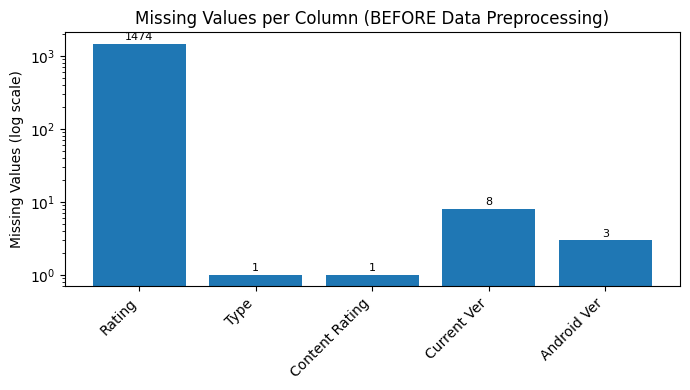

In [10]:
missing_counts = playstore.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(7,4))
bars = plt.bar(missing_counts.index, missing_counts.values)

plt.yscale('log')
plt.ylabel('Missing Values (log scale)')

for bar, v in zip(bars, missing_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, v*1.05, str(v),
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.title('Missing Values per Column (BEFORE Data Preprocessing)')
plt.tight_layout()
plt.show()

Grafik ini menunjukkan jumlah missing value yang ada di beberapa kolom. Terlihat di kolom Rating sangat banyak terdapat missing values sehingga akan di bersihkan setelah ini.

## **DATA CLEANING & PRE-PROCESSING**
---

### **CONVERT DATA TYPES**

#### **DATA TYPES CONVERTION & DATA ERROR HANDLING**

In [11]:
playstore['Installs'] = (
    playstore['Installs']
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
)

playstore['Installs'] = pd.to_numeric(playstore['Installs'], errors='coerce').astype('Int64')

In [12]:
playstore['Price'] = playstore['Price'].str.replace('$', '', regex=False)
playstore['Price'] = pd.to_numeric(playstore['Price'], errors='coerce')

In [13]:
playstore['Reviews'] = pd.to_numeric(playstore['Reviews'], errors='coerce').astype('Int64')

In [14]:
playstore['Rating'] = pd.to_numeric(playstore['Rating'], errors='coerce')


**1) Kolom `Installs`**  
Membersihkan simbol yang tidak diperlukan (`+` dan `,`) lalu mengonversinya menjadi tipe numerik (`Int64`). Langkah ini dilakukan agar jumlah instalasi dapat dianalisis secara kuantitatif.

**2) Kolom `Price`**  
Menghapus simbol dolar (`$`) kemudian mengubah nilainya menjadi tipe numerik (`float`) sehingga harga aplikasi berbayar dapat dihitung dan dibandingkan.

**3) Kolom `Reviews`**  
Mengonversi seluruh nilai menjadi tipe numerik (`Int64`) agar dapat digunakan untuk analisis statistik dan korelasi.

**4) Kolom `Rating`**  
Mengubah rating menjadi tipe `float` dengan `pd.to_numeric()` agar dapat diolah dalam perhitungan seperti distribusi, rata-rata, dan visualisasi.

#### **DATA TYPES RECHECK**

In [15]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  Int64  
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  Int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: Int64(2), float64(2), object(9)
memory usage: 1.1+ MB


#### **MISSING VALUES HANDLING**

Variabel error  yang tidak bisa diubah di step convert data value diubah menjadi `NaN` melalui Function `error='coerce'`
sehingga missing value sekarang adalah sebagai berikut:

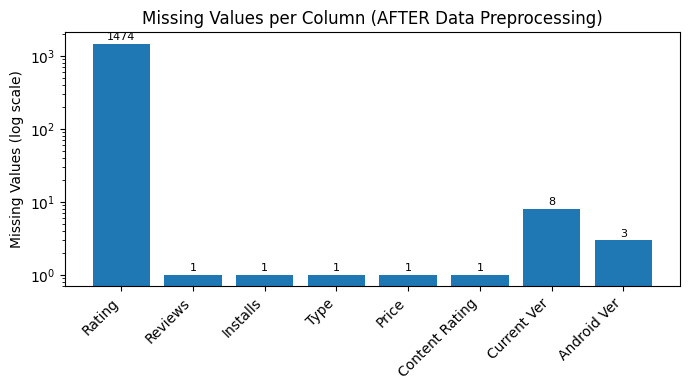

In [16]:
missing_counts = playstore.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(7,4))
bars = plt.bar(missing_counts.index, missing_counts.values)

plt.yscale('log')
plt.ylabel('Missing Values (log scale)')

for bar, v in zip(bars, missing_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, v*1.05, str(v),
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.title('Missing Values per Column (AFTER Data Preprocessing)')
plt.tight_layout()
plt.show()

In [17]:
print(playstore.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Lalu disini menghapus semua missing value `NaN` sehingga dataset telah benar-benar bersih.

In [18]:
playstore = playstore.dropna()
print(playstore.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


#### **SUMMARY**

In [19]:
initial_rows = 10841
initial_missing = 1474 + 1 + 1 + 1 + 1 + 8 + 3
initial_reviews_dtype = 'object'
initial_installs_dtype = 'object'
initial_price_dtype = 'object'

before = {
    'rows': initial_rows,
    'missing_total': initial_missing,
    'dtypes': {
        'Reviews': initial_reviews_dtype,
        'Installs': initial_installs_dtype,
        'Price': initial_price_dtype
    }
}

after = {
    'rows': 9360,
    'missing_total': 0,
    'dtypes': {
        'Reviews': 'Int64',
        'Installs': 'Int64',
        'Price': 'float64'
    }
}

print("========== DATA-CLEANING SUMMARY ==========")
print(f"Rows : {before['rows']} → {after['rows']}")
print(f"Missing values: {before['missing_total']} → {after['missing_total']}")
print("\nColumn type changes:")
for col in ['Reviews', 'Installs', 'Price']:
    print(f"  {col}: {before['dtypes'][col]} → {after['dtypes'][col]}")
print("===========================================")

========== DATA-CLEANING SUMMARY ==========
Rows : 10841 → 9360
Missing values: 1489 → 0

Column type changes:
  Reviews: object → Int64
  Installs: object → Int64
  Price: object → float64


Karena analisis berfokus pada **Rating, Reviews, Installs, dan Price**, baris yang memiliki missing value pada variabel ini dihapus. Total data berkurang dari 10.841 menjadi 9.360 baris $\text{(≈ -13,7%)}$, sehingga analisis berikut menggunakan dataset yang lengkap tanpa missing value.

## **EDA UNIVARIATE**
---

### **QUANTITATIVE VARIABLES**

#### **RATING**

In [20]:
num_cols = ['Rating']

for col in num_cols:
    print(f"\n--- {col} ---")
    print(f"Mean: {playstore[col].mean()}")
    print(f"Median: {playstore[col].median()}")
    print(f"Mode: {playstore[col].mode().tolist()}")
    print(f"Variance: {playstore[col].var()}")
    print(f"Standard Deviation: {playstore[col].std()}")
    print(f"Skewness: {playstore[col].skew()}")
    print(f"Kurtosis: {playstore[col].kurt()}")


--- Rating ---
Mean: 4.191837606837606
Median: 4.3
Mode: [4.4]
Variance: 0.2654959283216559
Standard Deviation: 0.5152629700664079
Skewness: -1.8501346146929738
Kurtosis: 5.789215980477894


- **Mean (4.19)**  
  Rata-rata rating aplikasi berada di angka 4.19, menunjukkan bahwa sebagian besar aplikasi memiliki penilaian yang cukup tinggi.

- **Median (4.3)**  
  Nilai tengah sedikit lebih tinggi dari mean, mengindikasikan distribusi rating miring ke kiri (left-skewed).


- **Mode (4.4)**  
  Rating yang paling sering muncul adalah 4.4, yang memperkuat bahwa mayoritas aplikasi dinilai baik oleh pengguna.

- **Variance (0.265) & Standard Deviation (0.515)**  
  Varians dan standar deviasi relatif kecil, menandakan rating aplikasi tidak terlalu tersebar dan cenderung berkumpul di sekitar nilai 4–5.

- **Skewness (-1.85)**  
  Skewness negatif yang besar menunjukkan distribusi berat ke arah kiri, artinya lebih banyak aplikasi yang memperoleh rating tinggi daripada rating rendah.

  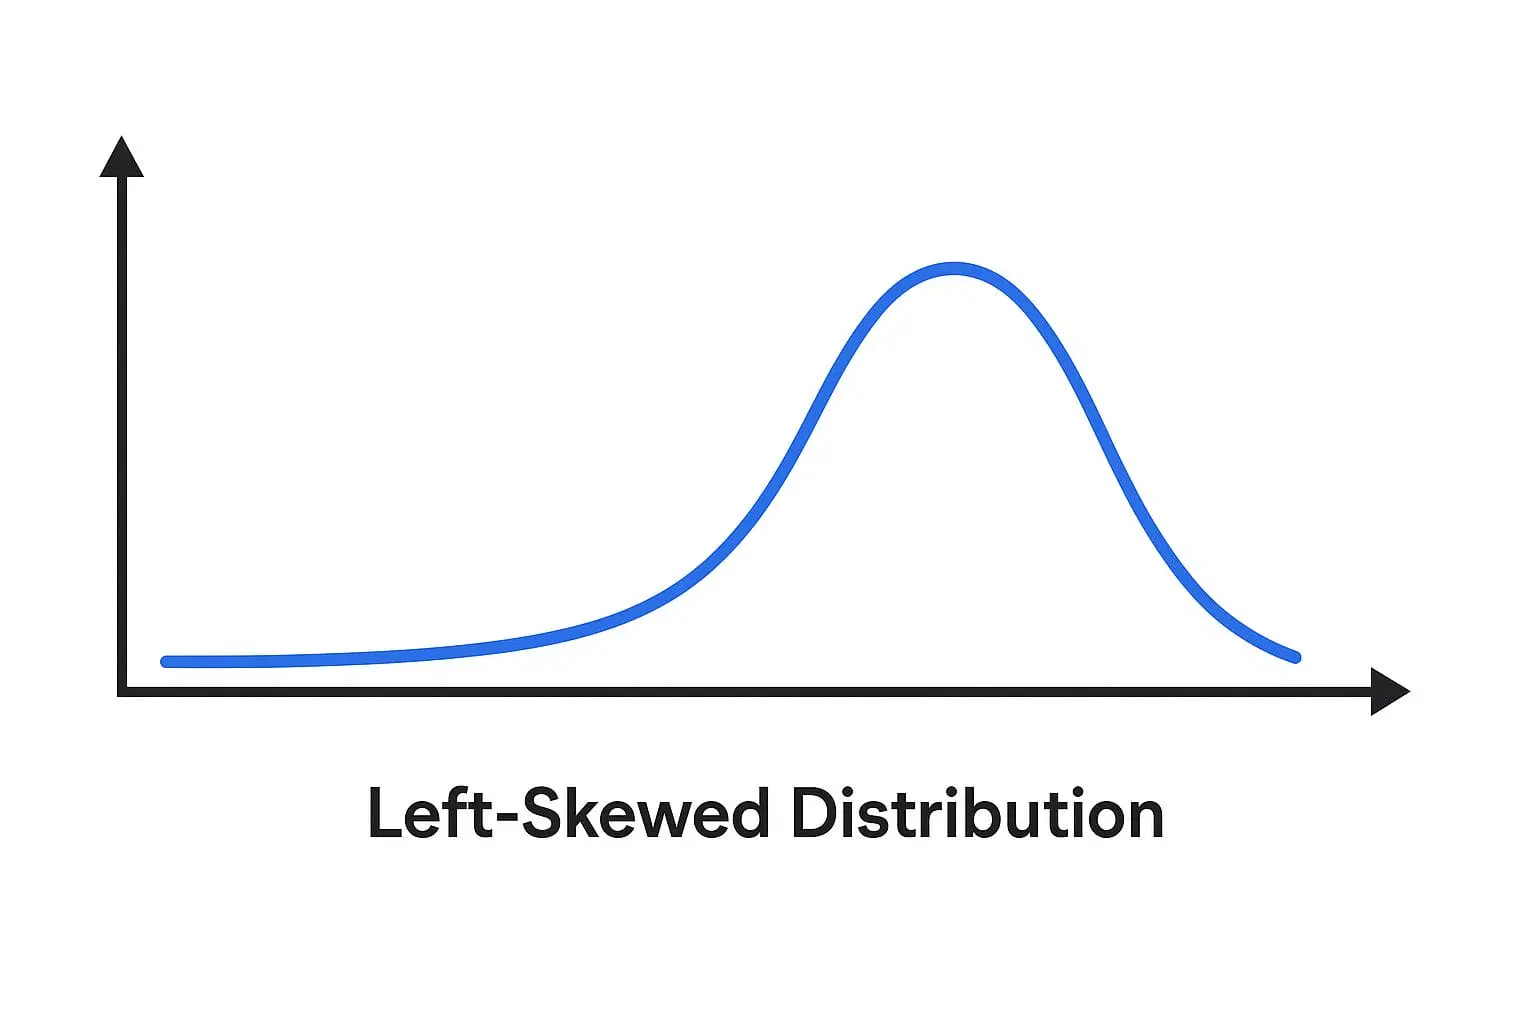

- **Kurtosis (5.79)**  
  Nilai kurtosis jauh di atas 3, menandakan distribusi **leptokurtic**, di mana data sangat terpusat di sekitar mean dan memiliki ekor yang lebih berat (extreme values).

  $
  \text{Platykurtic < 3}
  $
  
  $
  \text{Mesokurtic = 3}
  $
  
  $
  \text{Leptokurtic > 3}
  $

  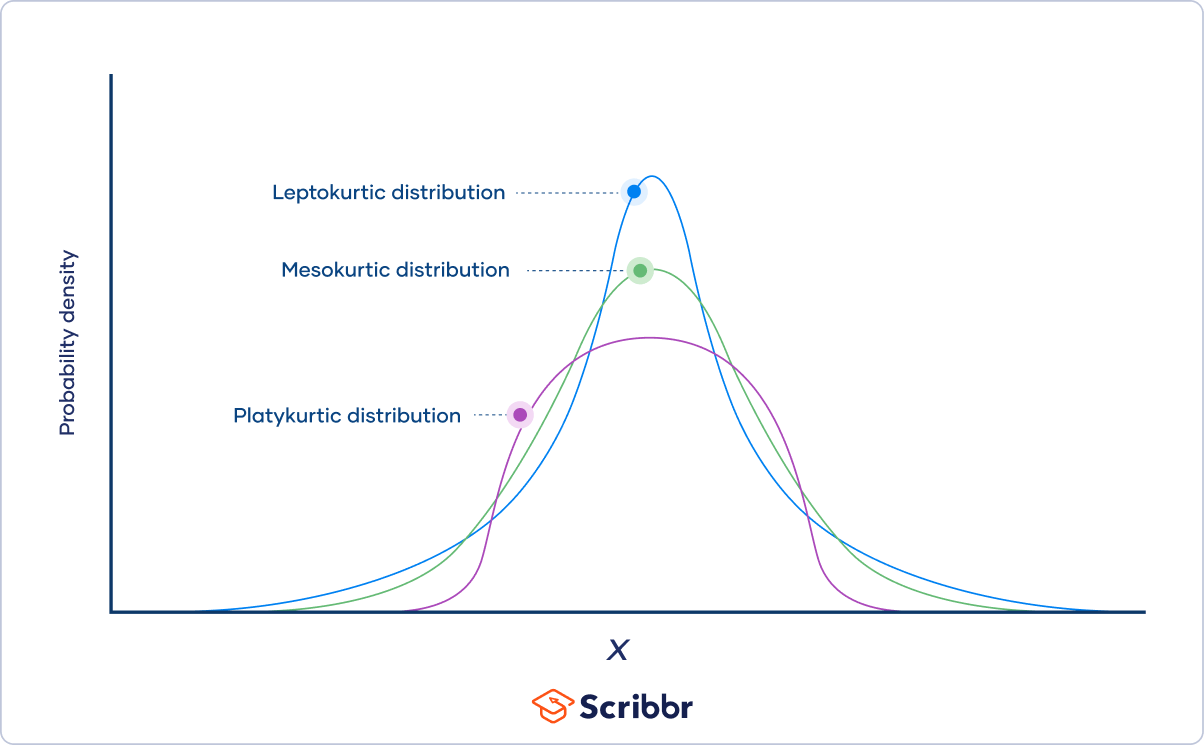

Secara keseluruhan, distribusi rating cenderung mengelompok pada nilai tinggi dan menunjukkan sedikit aplikasi dengan rating buruk.

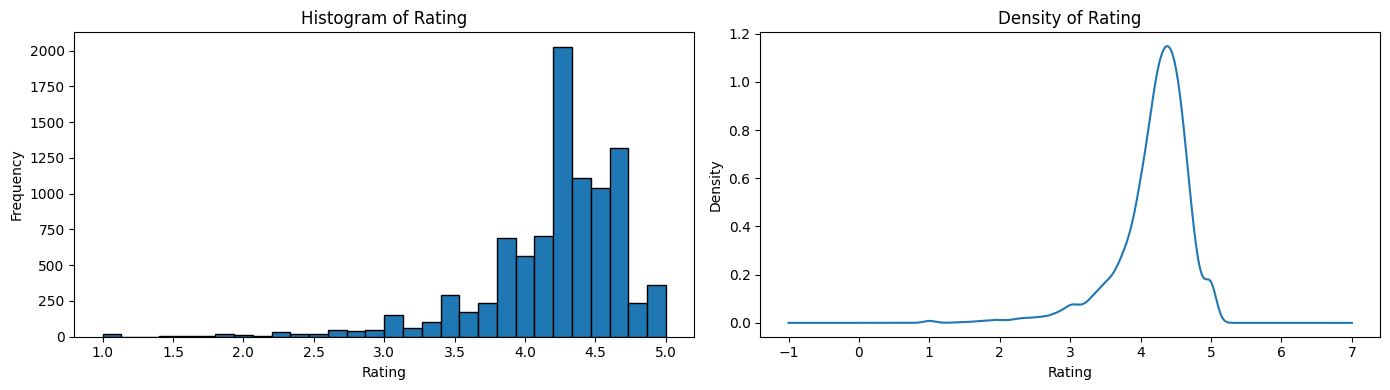

In [21]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(playstore['Rating'], bins=30, edgecolor='black')
plt.title('Histogram of Rating')
plt.xlabel('Rating'); plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
playstore['Rating'].plot.density()
plt.title('Density of Rating')
plt.xlabel('Rating'); plt.ylabel('Density')

plt.tight_layout(); plt.show()

Grafik histogram menunjukkan bahwa rating aplikasi di Google Play Store sangat didominasi oleh nilai tinggi, terutama pada rentang **4.0 hingga 4.8**. Frekuensi aplikasi dengan rating di bawah 3 relatif rendah, menandakan bahwa aplikasi dengan kualitas buruk jauh lebih sedikit dibandingkan aplikasi yang dinilai baik oleh pengguna.

Density plot memperjelas pola tersebut: distribusi memiliki satu puncak besar di sekitar rating **4.3–4.5**, yang menunjukkan bahwa sebagian besar aplikasi berkumpul pada nilai rating tersebut. Bentuk kurva yang condong ke kiri (**left-skewed**) mengonfirmasi hasil skewness negatif pada analisis statistik sebelumnya—lebih banyak aplikasi yang memiliki rating tinggi daripada rating rendah.

Distribusi seperti ini umum terjadi pada platform aplikasi karena pengguna cenderung hanya memberi rating pada aplikasi yang mereka sukai atau aplikasi populer yang telah terkurasi dengan baik.


#### **INSTALLS**

In [22]:
installs = playstore['Installs']

print('Mean   :', installs.mean())
print('Median :', installs.median())
print('Mode   :', installs.mode().tolist())
print('Var    :', installs.var())
print('Std    :', installs.std())
print('Skew   :', installs.skew())
print('Kurt   :', installs.kurt())


Mean   : 17908749.138675213
Median : 500000.0
Mode   : [1000000]
Var    : 8329549415490561.0
Std    : 91266365.19271797
Skew   : 8.88543117900357
Kurt   : 86.16828875610734


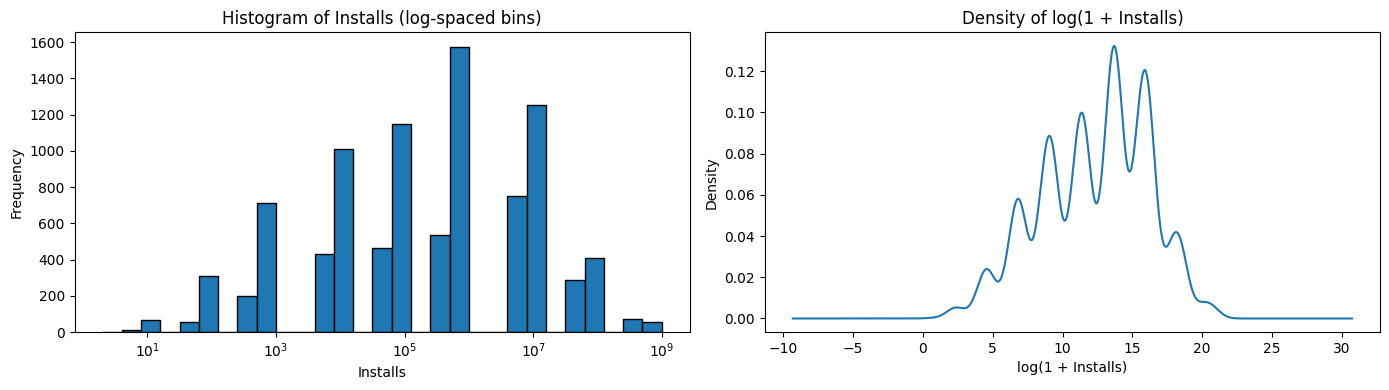

In [23]:
plt.figure(figsize=(14, 4))

bins = np.logspace(
    np.log10(installs.min()+1),
    np.log10(installs.max()+1),
    30
)

plt.subplot(1, 2, 1)
plt.hist(installs, bins=bins, edgecolor='black')
plt.xscale('log')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.title('Histogram of Installs (log-spaced bins)')
plt.tight_layout()

plt.subplot(1, 2, 2)
log_installs = np.log1p(installs)
log_installs.plot(kind='density')
plt.title('Density of log(1 + Installs)')
plt.xlabel('log(1 + Installs)')

plt.tight_layout(); plt.show()


Gambar di atas menunjukkan eksplorasi univariat untuk variabel Installs. Pada panel kiri ditampilkan histogram jumlah instalasi dengan sumbu-x logaritmik dan log-spaced bins. Penggunaan skala log diperlukan karena rentang Installs sangat lebar, mulai dari puluhan hingga ratusan juta instalasi.

Terlihat bahwa sebagian besar aplikasi berada pada rentang instalasi yang relatif rendah–menengah (sekitar $10^{2}$ sampai $10^{6}$ instalasi), sedangkan hanya sedikit aplikasi yang mencapai puluhan hingga ratusan juta instalasi. Hal ini konsisten dengan nilai skewness yang sangat positif, yaitu distribusi Installs sangat right-skewed dengan ekor panjang ke arah nilai besar.

Panel kanan menampilkan kurva kerapatan (density) dari variabel yang telah ditransformasikan menjadi $\text{log(1+Installs)}$.

Setelah transformasi log, bentuk distribusi menjadi jauh lebih simetris dan terkonsentrasi, sehingga lebih mendekati distribusi kontinu yang `normal` dibandingkan data mentahnya. Transformasi ini membantu mengurangi pengaruh outlier ekstrem dan akan lebih sesuai digunakan pada analisis lanjutan yang membutuhkan asumsi kedekatan terhadap normalitas.

#### **REVIEWS**

In [24]:
reviews = playstore['Reviews']

print('Mean   :', reviews.mean())
print('Median :', reviews.median())
print('Mode   :', reviews.mode().tolist())
print('Var    :', reviews.var())
print('Std    :', reviews.std())
print('Skew   :', reviews.skew())
print('Kurt   :', reviews.kurt())

Mean   : 514376.7052350427
Median : 5955.0
Mode   : [2]
Var    : 9891171278392.031
Std    : 3145023.255620224
Skew   : 15.303031077506896
Kurt   : 294.9103967205607


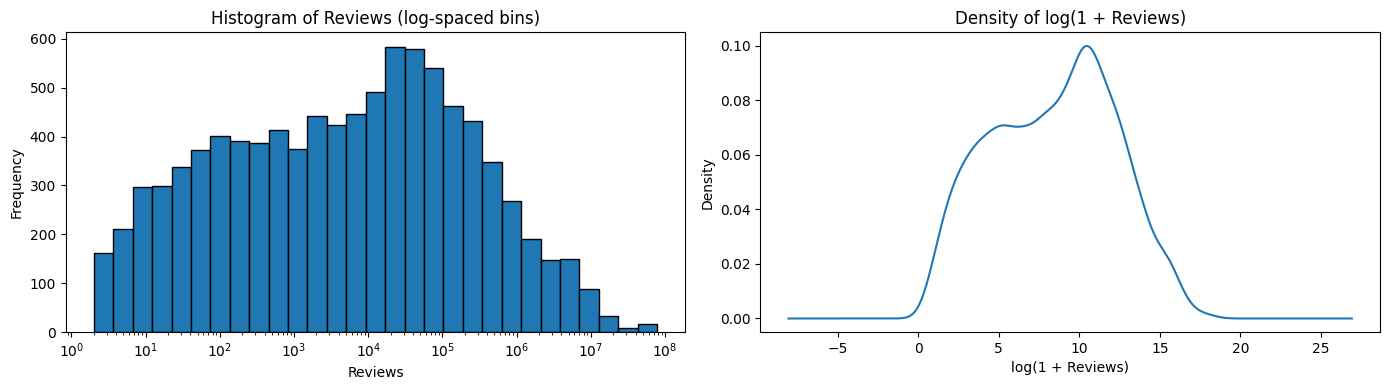

In [25]:
plt.figure(figsize=(14, 4))

bins = np.logspace(
    np.log10(reviews.min()+1),
    np.log10(reviews.max()+1),
    30
)

plt.subplot(1, 2, 1)
plt.hist(reviews, bins=bins, edgecolor='black')
plt.xscale('log')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Reviews (log-spaced bins)')
plt.tight_layout()

plt.subplot(1, 2, 2)
log_reviews = np.log1p(reviews)
log_reviews.plot(kind='density')
plt.title('Density of log(1 + Reviews)')
plt.xlabel('log(1 + Reviews)')

plt.tight_layout(); plt.show()

### **PRICE**

In [75]:
price = playstore['Price']

print('Mean   :', price.mean())
print('Median :', price.median())
print('Mode   :', price.mode().tolist())
print('Var    :', price.var())
print('Std    :', price.std())
print('Skew   :', price.skew())
print('Kurt   :', price.kurt())

Mean   : 0.9612788461538462
Median : 0.0
Mode   : [0.0]
Var    : 250.3243001166196
Std    : 15.821640247351715
Skew   : 24.394445741391166
Kurt   : 604.1886049408731


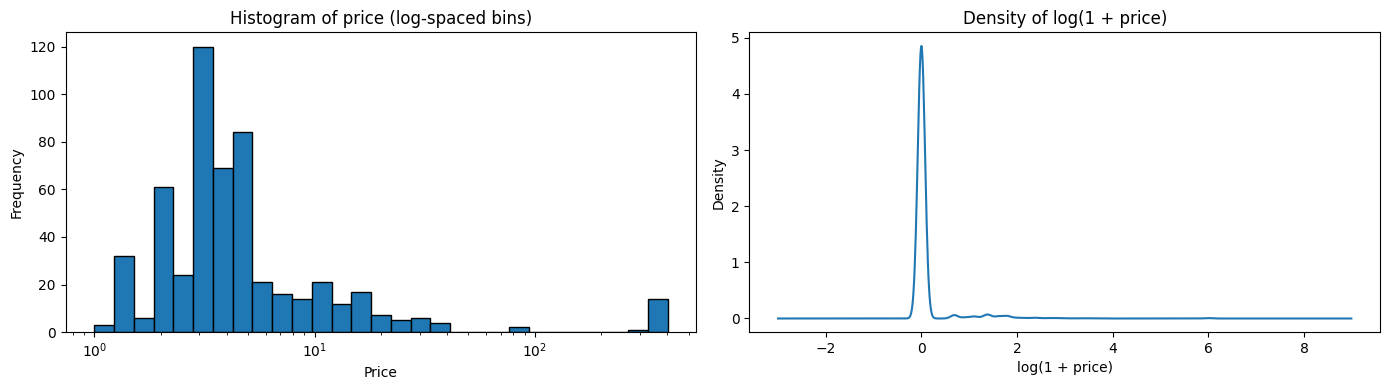

In [76]:
plt.figure(figsize=(14, 4))

bins = np.logspace(
    np.log10(price.min()+1),
    np.log10(price.max()+1),
    30
)

plt.subplot(1, 2, 1)
plt.hist(price, bins=bins, edgecolor='black')
plt.xscale('log')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of price (log-spaced bins)')
plt.tight_layout()

plt.subplot(1, 2, 2)
log_price = np.log1p(price)
log_price.plot(kind='density')
plt.title('Density of log(1 + price)')
plt.xlabel('log(1 + price)')

plt.tight_layout(); plt.show()

### **CATEGORICAL VARIABLES**




#### **CATEGORY**

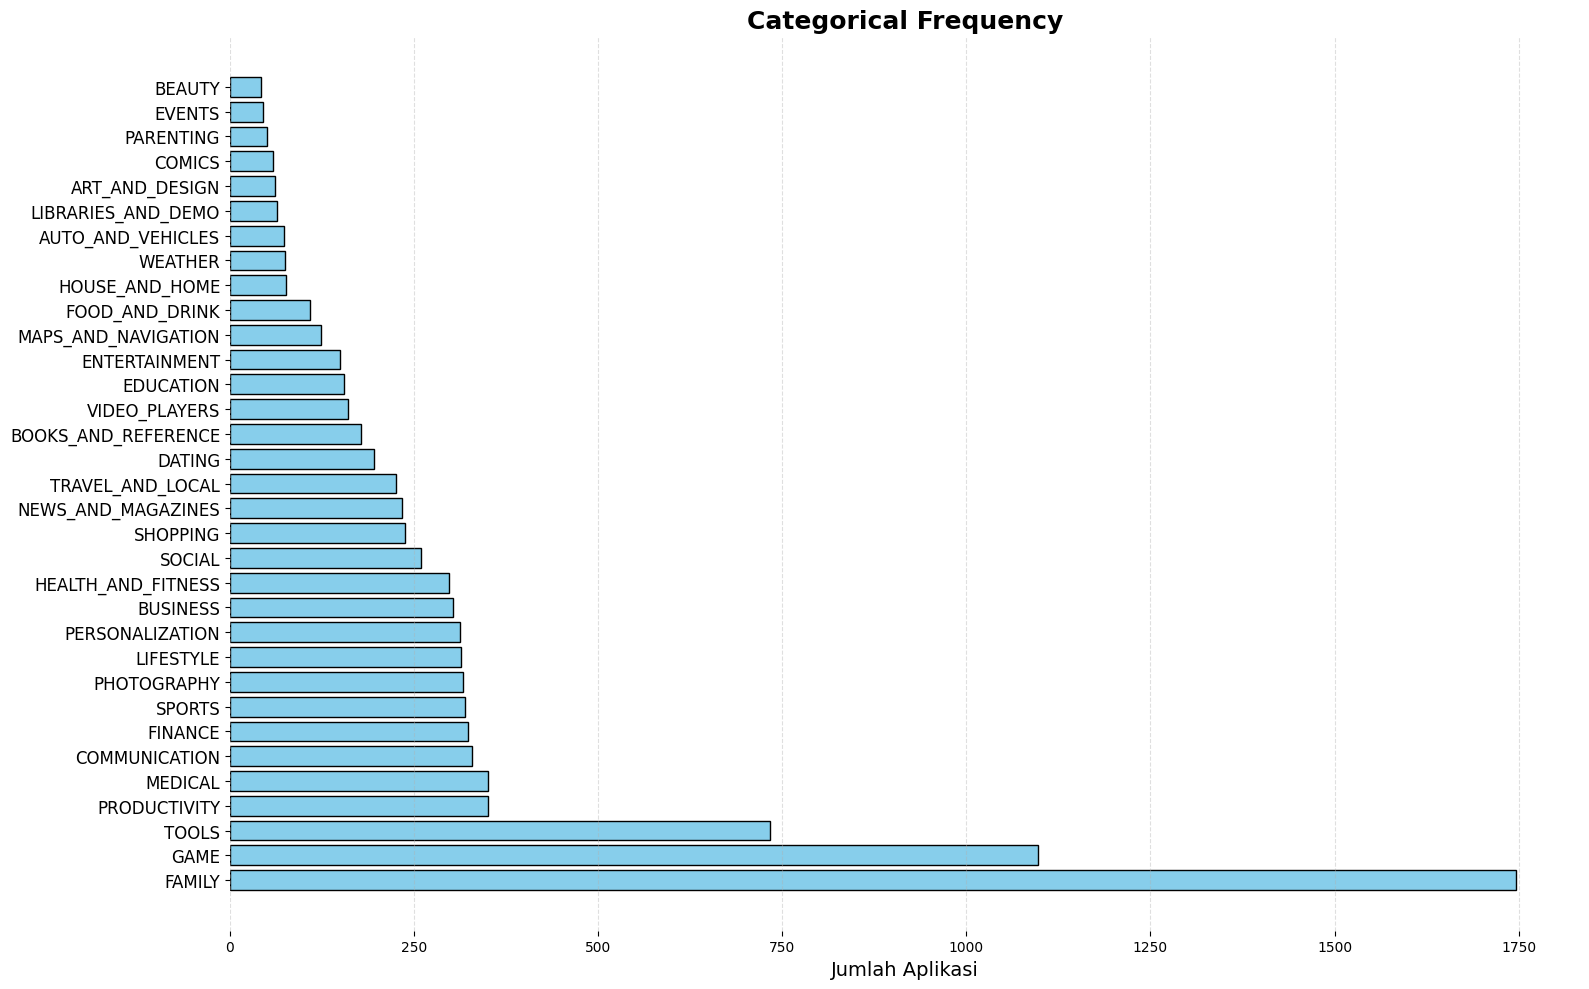

In [26]:
plt.figure(figsize=(16, 10))
top = playstore['Category'].value_counts()
plt.barh(top.index, top.values, color='skyblue', edgecolor='black')
plt.title('Categorical Frequency', fontsize=18, weight='bold')
plt.xlabel('Jumlah Aplikasi', fontsize=14)
plt.tick_params(axis='y', labelsize=12)
plt.grid(axis='x', ls='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa jumlah aplikasi tidak tersebar merata di setiap kategori. Kategori **FAMILY** merupakan yang terbanyak, diikuti oleh **GAME**, **TOOLS**, dan **PRODUCTIVITY**, yang menunjukkan tingginya minat developer dalam bidang hiburan, utilitas, dan aplikasi sehari-hari.

Kategori seperti **BEAUTY**, **EVENTS**, **PARENTING**, dan **COMICS** memiliki jumlah aplikasi yang jauh lebih sedikit. Hal ini menggambarkan bahwa kategori tersebut merupakan niche market yang tidak memiliki banyak kompetitor.

### **TYPE**

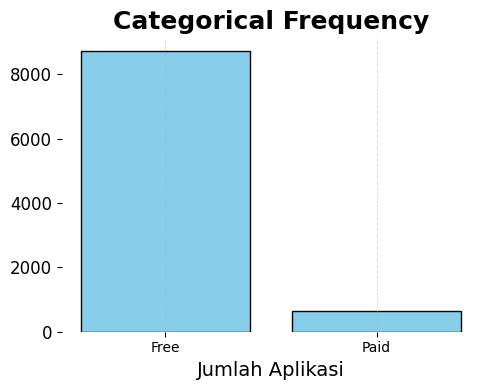

In [27]:
plt.figure(figsize=(5, 4))
top = playstore['Type'].value_counts()
plt.bar(top.index, top.values, color='skyblue', edgecolor='black')
plt.title('Categorical Frequency', fontsize=18, weight='bold')
plt.xlabel('Jumlah Aplikasi', fontsize=14)
plt.tick_params(axis='y', labelsize=12)
plt.grid(axis='x', ls='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa mayoritas aplikasi di Google Play Store merupakan **aplikasi gratis (Free)**, dengan jumlah yang jauh lebih besar dibandingkan aplikasi **berbayar (Paid)**. Hal ini menggambarkan kecenderungan pasar aplikasi Android yang lebih didominasi oleh model distribusi gratis, di mana monetisasi biasanya dilakukan melalui iklan atau pembelian dalam aplikasi.  

Aplikasi berbayar hanya mencakup sebagian kecil dari total aplikasi yang tersedia, sehingga persaingan di kategori paid relatif lebih rendah dibandingkan aplikasi gratis.


## **EDA BIVARIATE & MULTIVARIATE**
---



### **NUMERICAL CORELATION**




#### **PEARSON CORRELATION ANALYSYS**

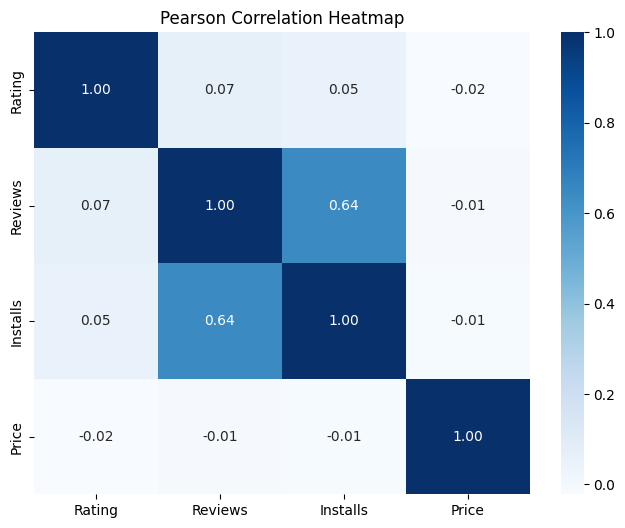


=== PEARSON CORRELATION ===
            Rating   Reviews  Installs     Price
Rating    1.000000  0.068133  0.051337 -0.021919
Reviews   0.068133  1.000000  0.641605 -0.009824
Installs  0.051337  0.641605  1.000000 -0.011895
Price    -0.021919 -0.009824 -0.011895  1.000000


In [28]:
num_cols = ['Rating', 'Reviews', 'Installs', 'Price']

pearson_corr = playstore[num_cols].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

print("\n=== PEARSON CORRELATION ===")
print(pearson_corr)

Korelasi antar variabel numerik utama dianalisis menggunakan Pearson correlation. Heatmap di atas menunjukkan bahwa:

Rating hampir tidak berkorelasi dengan jumlah **Reviews** maupun **Installs**

*   $\text{(koefisien sekitar 0,05–0,07)}$ dan juga hampir tidak berkorelasi dengan **Price** $\text{(sekitar –0,02)}$. Artinya, secara linear tidak terlihat hubungan yang kuat antara tingginya rating dengan banyaknya review, banyaknya instalasi, ataupun harga aplikasi.

*   **Reviews** dan **Installs** memiliki korelasi positif yang cukup kuat $(≈ 0,64)$. Hal ini masuk akal karena aplikasi yang banyak diinstal cenderung lebih sering menerima ulasan dari pengguna.

*   **Price** memiliki korelasi yang sangat lemah dengan **Reviews** dan **Installs** $\text{(mendekati 0)}$, sehingga harga aplikasi tidak terlihat berhubungan secara linear dengan jumlah unduhan maupun jumlah ulasan.

#### **SPEARMAN CORRELATION ANALYSIS**

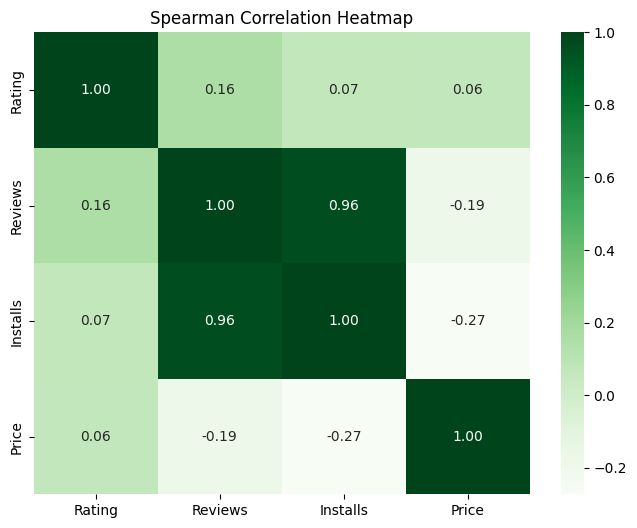


=== SPEARMAN CORRELATION ===
            Rating   Reviews  Installs     Price
Rating    1.000000  0.156422  0.069494  0.064498
Reviews   0.156422  1.000000  0.964154 -0.191197
Installs  0.069494  0.964154  1.000000 -0.273070
Price     0.064498 -0.191197 -0.273070  1.000000


In [29]:
num_cols = ['Rating', 'Reviews', 'Installs', 'Price']

spearman_corr = playstore[num_cols].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, cmap='Greens', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

print("\n=== SPEARMAN CORRELATION ===")
print(spearman_corr)

Korelasi juga dihitung menggunakan Spearman correlation untuk menangkap hubungan monoton dan mengurangi pengaruh outlier pada variabel Reviews, Installs, dan Price.

Dari heatmap terlihat bahwa:



*   Terdapat korelasi sangat kuat antara **Reviews** dan **Installs** $\text{(ρ ≈ 0,96)}$. Artinya, jika aplikasi memiliki peringkat (ranking) jumlah review yang tinggi, hampir pasti ia juga berada pada ranking instalasi yang tinggi.

*   **Rating** memiliki korelasi positif tetapi masih lemah dengan **Reviews** $\text{(ρ ≈ 0,16)}$ dan **Installs** $\text{(ρ ≈ 0,07)}$. Aplikasi yang lebih banyak di-review atau lebih banyak diinstal cenderung sedikit lebih tinggi rating-nya, tetapi hubungannya tidak kuat.

*   **Price** berkorelasi negatif dengan **Reviews** $\text{(ρ ≈ –0,19)}$ dan **Installs** $\text{(ρ ≈ –0,27)}$. Artinya, secara ranking, aplikasi yang lebih mahal cenderung berada pada ranking jumlah review dan instalasi yang lebih rendah (aplikasi berbayar kurang populer dibanding aplikasi gratis/murah), meskipun hubungan ini juga tidak terlalu kuat.

**Pearson** mengukur hubungan linear dan sensitif terhadap outlier, sedangkan **Spearman** cukup stabil terhadap skew/outlier karena memakai peringkat (rank). Pada data ini, **Spearman** menangkap korelasi **Reviews–Installs** yang lebih tinggi $\text{(≈0.96)}$ dibanding **Pearson** $\text{(≈0.64)}$, sejalan dengan distribusi *heavy-tail* pada skala asli.

#### **BIVARIATE ANALYSYS**

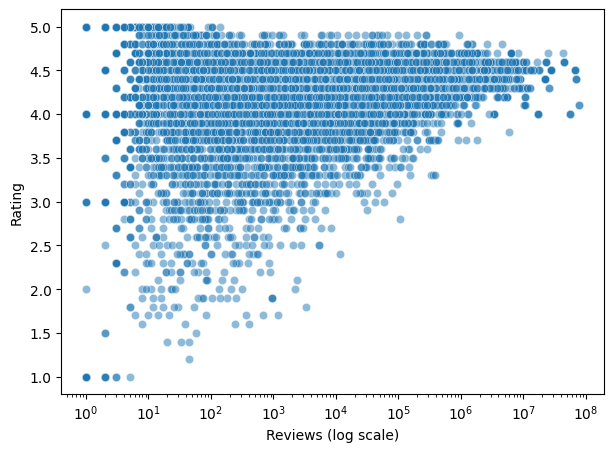

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Reviews', y='Rating', data=playstore, alpha=0.5)
plt.xscale('log')
plt.xlabel('Reviews (log scale)')
plt.ylabel('Rating')
plt.show()

Scatterplot di atas memperlihatkan hubungan antara **Reviews** dan **Rating**, dalam skala logaritmik.

*   Titik-titik banyak terkonsentrasi pada rating 4,0–4,7, menunjukkan bahwa mayoritas aplikasi di Google Play Store memiliki rating yang cukup tinggi.

*   Di bagian kiri, sebaran rating sangat lebar, ada aplikasi yang mendapat rating sangat rendah hingga sangat tinggi. Hal ini menunjukkan bahwa ketika reviewer masih sedikit, rating masih “belum stabil” dan mudah dipengaruhi beberapa penilaian ekstrem.

*   Di bagian kanan, titik-titik makin rapat di sekitar 4,0–4,6 dan hampir tidak ada rating ekstrem. Artinya, semakin banyak pengguna yang memberi ulasan, rating aplikasi cenderung semakin stabil dan berkumpul di kisaran tinggi, sedangkan rating sangat rendah menjadi jarang.

Secara keseluruhan, pola ini menunjukkan bahwa popularitas (jumlah review) tidak otomatis membuat rating jauh lebih tinggi, tetapi lebih membuat rating menjadi lebih konsisten di sekitar nilai tinggi yang “wajar” untuk aplikasi yang sudah lama bertahan di pasar.

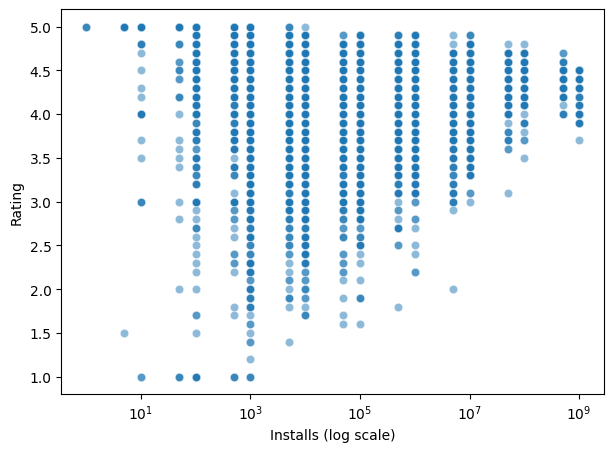

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Installs', y='Rating', data=playstore, alpha=0.5)
plt.xscale('log')
plt.xlabel('Installs (log scale)')
plt.ylabel('Rating')
plt.show()

Scatterplot di atas menggambarkan hubungan antara **jumlah instalasi (Installs)** dan **rating aplikasi**, dalam skala logaritmik.

*   Titik-titik tersebar di berbagai level instalasi, tetapi pola vertikal yang rapat menunjukkan bahwa banyak aplikasi berada pada “tangga” jumlah instalasi tertentu (misalnya 1.000+, 10.000+, 100.000+, dst. sesuai format di Play Store).

*   Pada level instalasi yang rendah hingga menengah, sebaran rating masih sangat lebar, ada yang mendapat rating sangat rendah hingga sangat tinggi. Artinya, di tahap awal, kualitas aplikasi sangat bervariasi dan belum terseleksi.

*   Pada level instalasi yang sangat besar, rating cenderung berkumpul di kisaran tinggi sekitar 4,0–4,6 dan hampir tidak ada aplikasi dengan rating sangat rendah. Aplikasi yang mampu mencapai instalasi sangat besar umumnya sudah “lulus seleksi pasar”, jika kualitasnya buruk, pengguna tidak akan terus mengunduh dan mempertahankannya.

Secara keseluruhan, grafik ini menunjukkan bahwa popularitas tinggi dengan banyak instalasi biasanya disertai rating yang cukup baik dan lebih stabil, sedangkan aplikasi dengan instalasi sedikit memiliki kualitas yang jauh lebih beragam.

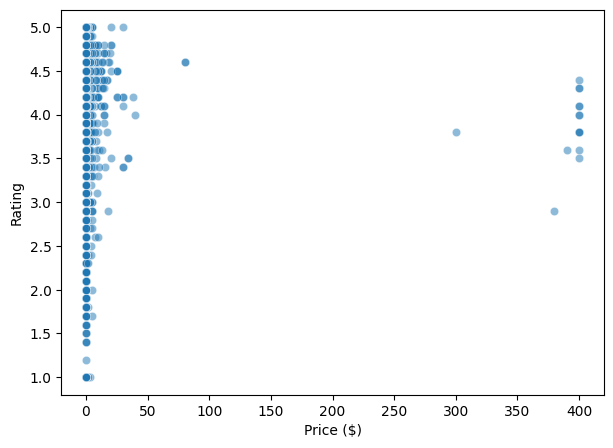

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Price', y='Rating', data=playstore, alpha=0.5)
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

Scatterplot di atas menunjukkan hubungan antara **harga aplikasi (Price)** dan **rating**. Terlihat bahwa hampir semua titik berkumpul di Price = 0, yang berarti aplikasi gratis benar-benar mendominasi di dataset. Rating aplikasi gratis cukup beragam, mulai dari sangat rendah hingga 5.0, tetapi sebagian besar tetap berada di kisaran tinggi sekitar 4.0–4.6.

Di sisi lain, hanya sedikit aplikasi berbayar dan harganya tersebar dari sekitar 0.99 hingga 400 dolar. Titik-titik berbayar ini umumnya memiliki rating yang cenderung tinggi (sekitar ≥ 4.0) dan hampir tidak ada aplikasi berbayar dengan rating sangat buruk.

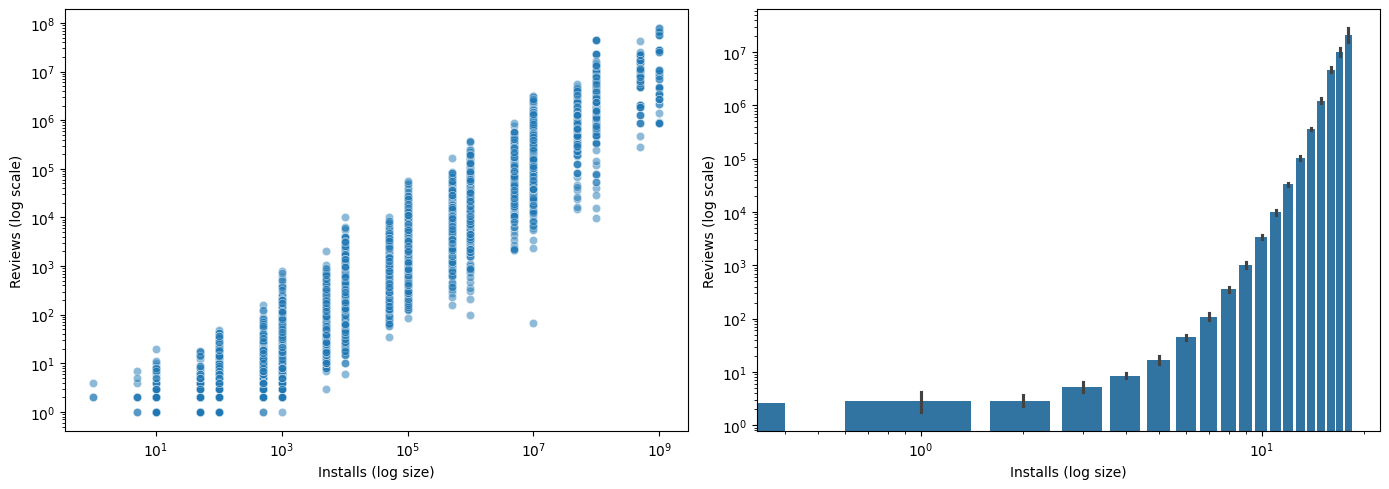

In [33]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Installs', y='Reviews', data=playstore, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Installs (log size)')
plt.ylabel('Reviews (log scale)')

plt.subplot(1,2,2)
sns.barplot(x='Installs', y='Reviews', data=playstore)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Installs (log size)')
plt.ylabel('Reviews (log scale)')

plt.tight_layout()
plt.show()

Kedua grafik di atas menggambarkan hubungan antara **jumlah instalasi dan jumlah ulasan aplikasi**:

**Scatterplot** menunjukkan setiap aplikasi sebagai satu titik pada skala log–log. Terlihat pola yang hampir diagonal: semakin besar jumlah instalasi, semakin besar pula jumlah ulasan. Ini wajar karena aplikasi yang banyak diunduh cenderung lebih sering mendapat review dari pengguna.

Titik-titik membentuk “tiang-tiang” vertikal karena jumlah instalasi di Play Store biasanya berada pada level diskrit (1.000+, 10.000+, 100.000+, dst).

**Barplot** merangkum hubungan tersebut dengan menampilkan rata-rata jumlah ulasan pada setiap level instalasi. Batang-batangnya menunjukkan tren yang meningkat tajam:

Aplikasi dengan instalasi rendah memiliki rata-rata review yang sangat sedikit.

Kelompok instalasi 100 ribu hingga 1 juta merupakan kelompok paling “ramai”, dengan rata-rata review yang jauh lebih tinggi — sebagian besar aplikasi berada di rentang ini.

Pada level instalasi 10 juta hingga 1 miliar, jumlah aplikasi lebih sedikit, tetapi rata-rata review-nya sangat besar, menggambarkan aplikasi super-populer.

Kedua grafik menegaskan bahwa **installs dan reviews memiliki hubungan yang sangat kuat**: semakin tinggi kelas instalasi, semakin besar pula rata-rata jumlah ulasan yang diterima aplikasi.

### **CATEGORICAL CORELATION ANALYSYS**

<Figure size 1800x1200 with 0 Axes>

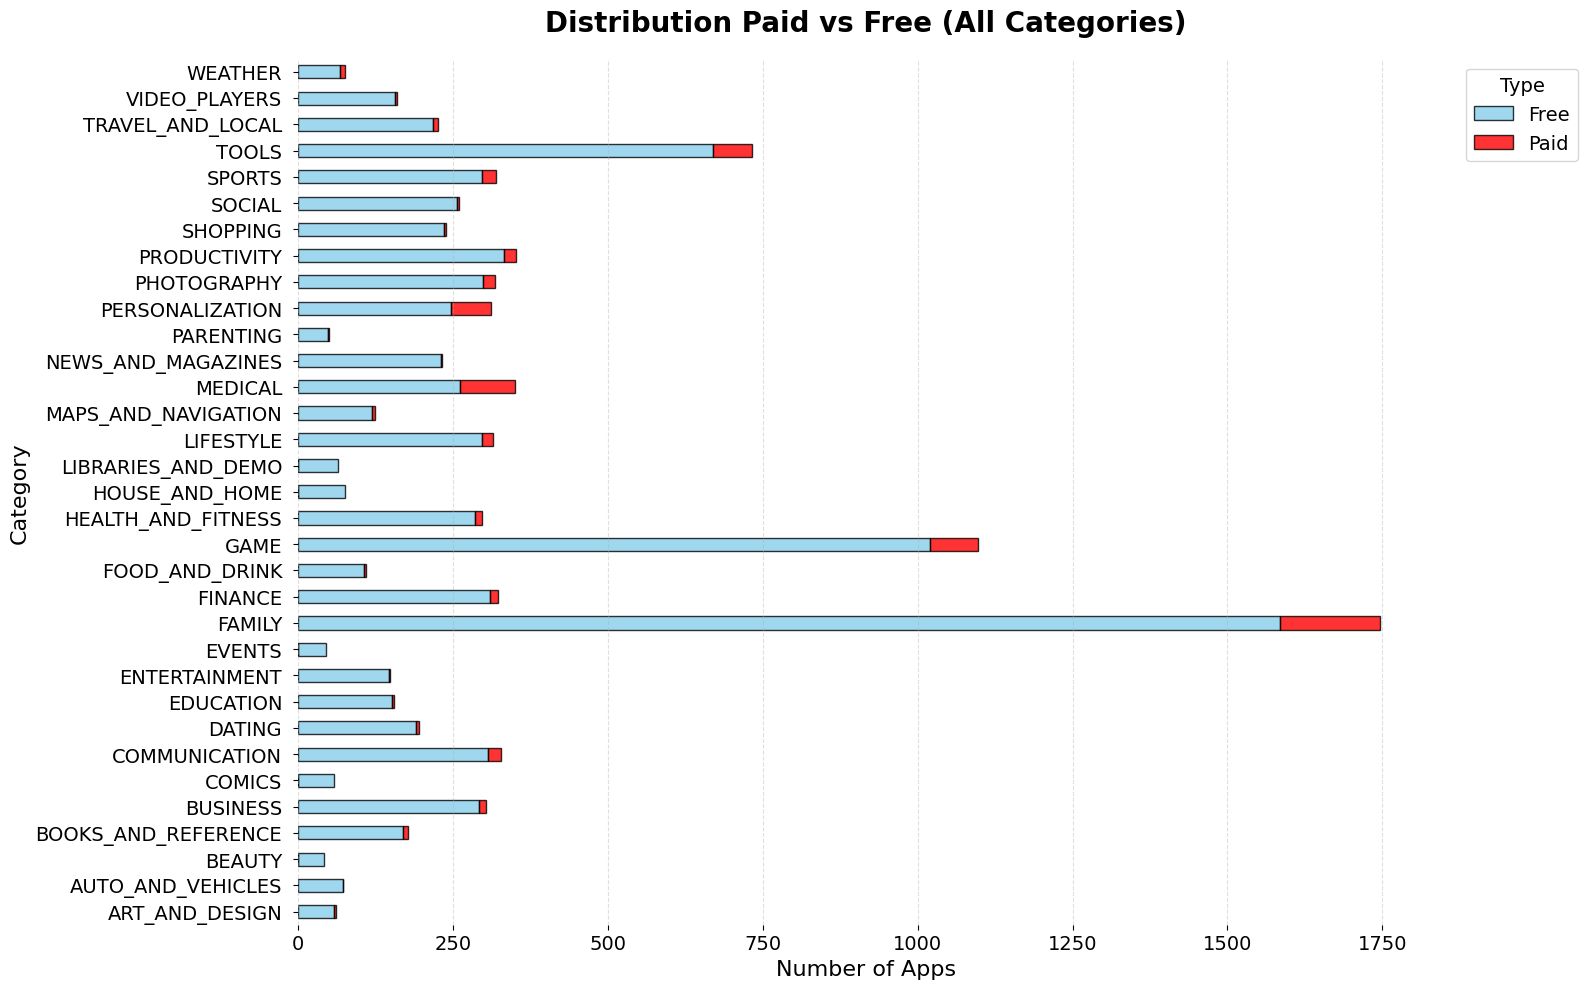

In [34]:
all_cat = playstore['Category'].value_counts().index
df_all = playstore[playstore['Category'].isin(all_cat)]

freq_tbl = df_all.groupby(['Category', 'Type']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 12))
ax = freq_tbl.plot(kind='barh', stacked=True,
                   color=['skyblue', 'red'],
                   edgecolor='black', alpha=0.8,
                   figsize=(16, 10))

plt.title('Distribution Paid vs Free (All Categories)', fontsize=20, weight='bold', pad=20)
plt.xlabel('Number of Apps', fontsize=16)
plt.ylabel('Category', fontsize=16)

ax.tick_params(axis='y', labelsize=14, pad=8)
ax.tick_params(axis='x', labelsize=14)

plt.legend(title='Type', title_fontsize=14, fontsize=14,
           bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', ls='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

- Model freemium/free-to-play sangat mendominasi Play Store.
- Aplikasi berbayar (Paid) hanya signifikan di kategori produktivitas, kesehatan, dan game — tempat user merasa ada “nilai tambah” untuk membayar.

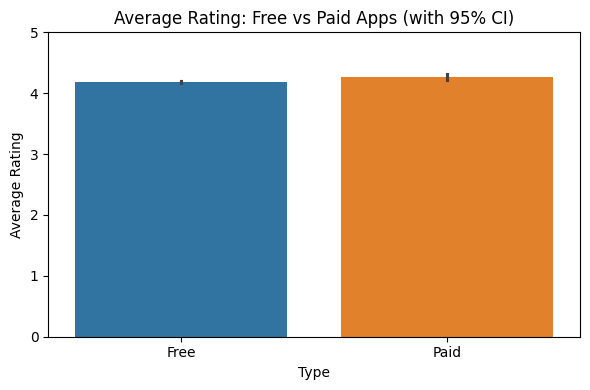

       mean   ci95
Type              
Free  4.186  0.011
Paid  4.267  0.042


In [35]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=playstore,
    x='Type',
    y='Rating',
    hue='Type',
    legend=False,
    errorbar=('ci', 95)
)
plt.title('Average Rating: Free vs Paid Apps (with 95% CI)')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

summary = (
    playstore
    .groupby('Type')['Rating']
    .agg(n='count', mean='mean', std='std')
    .assign(
        se=lambda d: d['std'] / np.sqrt(d['n']),      # standard error
        ci95=lambda d: 1.96 * d['se']                 # kira-kira 95% CI
    )
)

print(summary[['mean', 'ci95']].round(3))


- Aplikasi berbayar (Paid) cenderung memiliki rating rata-rata YANG LEBIH TINGGI dan signifikan dibanding aplikasi gratis.
- Ini bisa jadi karena:
  - ekspektasi user lebih tinggi terhadap produk berbayar,
  - kualitas memang lebih terjamin (dev punya insentif untuk maintenance),
  - atau user yang sudah membayar lebih “berkomitmen” untuk memberi penilaian positif.

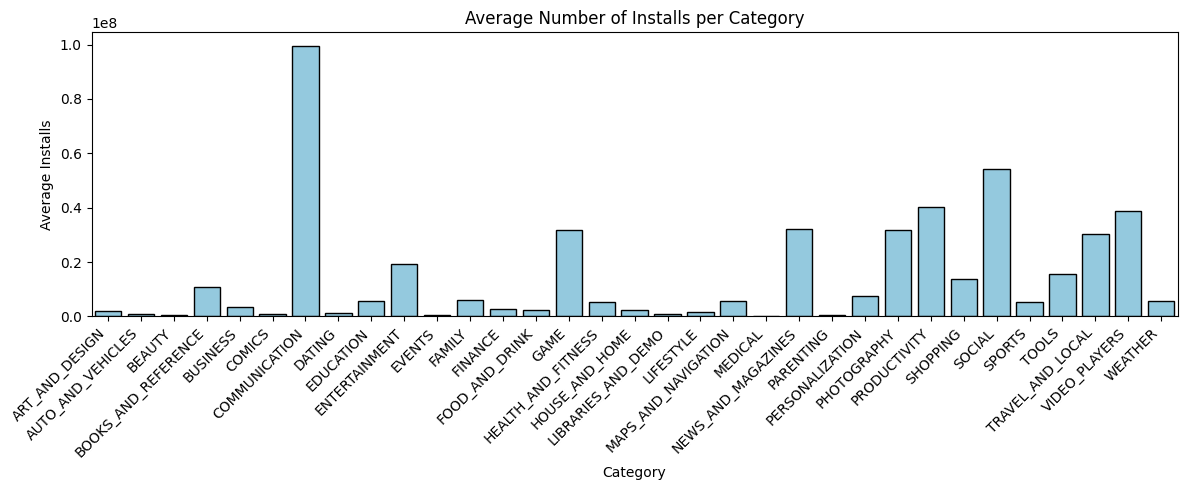

In [36]:
install_by_cat = playstore.groupby('Category')['Installs'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(
    data=install_by_cat,
    x='Category', y='Installs',
    color='skyblue', edgecolor='black',
    errorbar=None
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Installs')
plt.title('Average Number of Installs per Category')
plt.tight_layout()
plt.show()

- Aplikasi komunikasi & sosial sangat dominan — setiap orang butuh chat, medsos, kamera.
- Transformasi log membuat perbedaan 10× (1e7 vs 1e8) terlihat sebagai satu tingkat batang — mudah lihat “kelas populer” vs “kelas niche” secara sekilah.
- Banyak kategori yang sulit meraih jumlah install yang tinggi

## **OUTLIER AND TRANSFORMATION**
---


### **OUTLIER DETECTION**

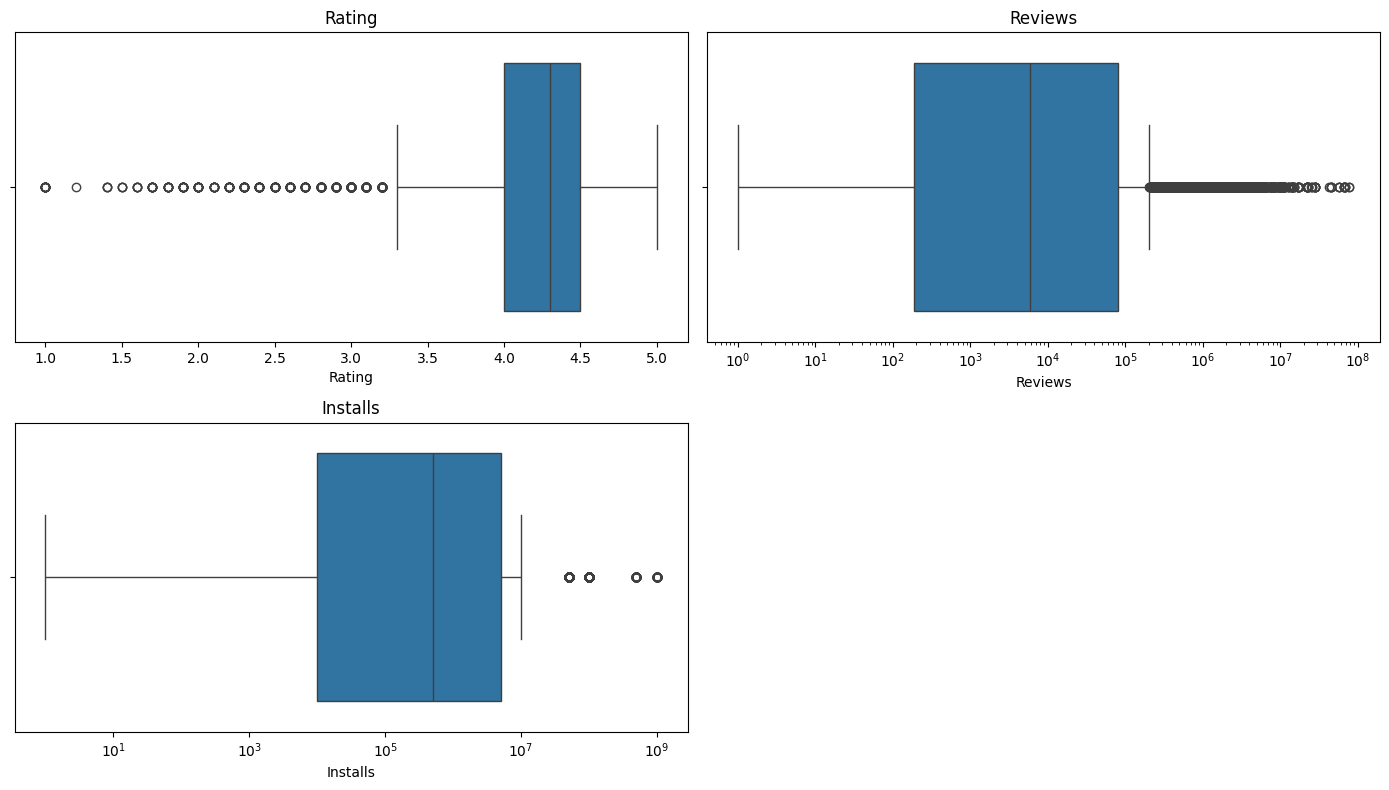

In [37]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=playstore['Rating'])
plt.title('Rating')

plt.subplot(2, 2, 2)
sns.boxplot(x=playstore['Reviews'])
plt.title('Reviews')
plt.xscale('log')

plt.subplot(2, 2, 3)
sns.boxplot(x=playstore['Installs'])
plt.title('Installs')
plt.xscale('log')

plt.tight_layout(); plt.show()

In [38]:
playstore['Rating'].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

,Rating
0.25,4.0
0.50,4.3
0.75,4.5
0.90,4.7
0.99,5.0


**Rating** dibatasi antara 1–5. Setelah data yang tidak valid (di luar rentang tersebut) dibersihkan, distribusi rating relatif terkonsentrasi di sekitar 4–5, sehingga outlier rating tidak menjadi masalah sebesar variabel lain.

In [39]:
playstore['Reviews'].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

,Reviews
0.25,186.75
0.50,5955.0
0.75,81627.5
0.90,591321.9
0.99,9882937.48


Distribusi **Reviews** sangat right-skewed: sebagian besar aplikasi hanya memiliki sedikit ulasan, tetapi ada beberapa aplikasi dengan ratusan ribu hingga jutaan ulasan yang muncul sebagai outlier di boxplot.

In [40]:
playstore['Installs'].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

,Installs
0.25,10000.0
0.50,500000.0
0.75,5000000.0
0.90,10000000.0
0.99,500000000.0


Polanya mirip dengan **Reviews**. Mayoritas aplikasi berada pada rentang puluhan hingga ratusan ribu instalasi, sementara sedikit aplikasi sangat populer dengan puluhan–ratusan juta instalasi sehingga tampak sebagai outlier ekstrem.

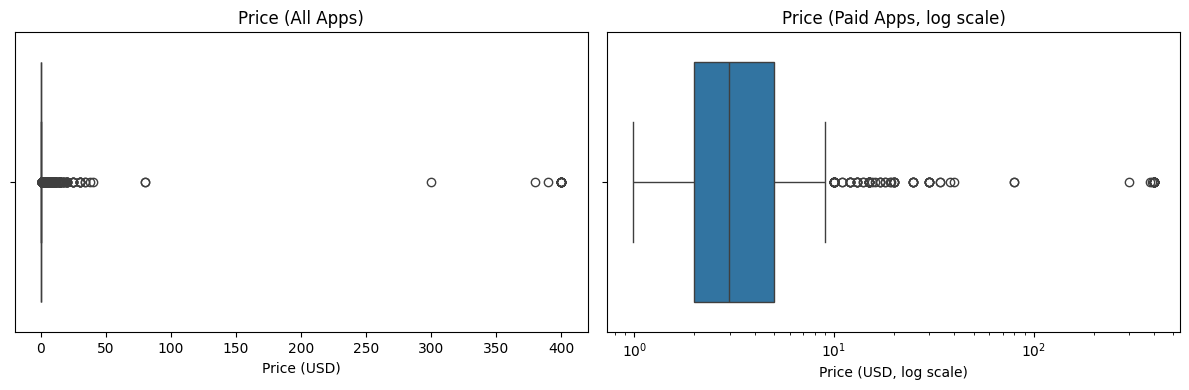

In [41]:
paid_price = playstore[playstore['Price'] > 0]['Price']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=playstore['Price'])
plt.title('Price (All Apps)')
plt.xlabel('Price (USD)')

plt.subplot(1, 2, 2)
sns.boxplot(x=paid_price)
plt.xscale('log')
plt.title('Price (Paid Apps, log scale)')
plt.xlabel('Price (USD, log scale)')

plt.tight_layout()
plt.show()


In [42]:
playstore['Price'].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

,Price
0.25,0.00
0.50,0.00
0.75,0.00
0.90,0.00
0.99,8.99


In [43]:
paid_price.quantile([0.25, 0.5, 0.75, 0.9, 0.99])

,Price
0.25,1.99
0.50,2.99
0.75,4.99
0.90,11.99
0.99,399.99


Sebagian besar aplikasi berharga 0 (Free), sedangkan hanya sebagian kecil yang berbayar dengan harga cukup tinggi (puluhan hingga ratusan dolar). Nilai-nilai harga yang sangat besar ini muncul sebagai outlier pada skala asli.

### **OUTLIER HANDLING**

Outlier pada **Reviews, Installs, dan Price** dianggap sebagai aplikasi yang memang sangat populer atau sangat mahal, bukan kesalahan data. Oleh karena itu:

Tidak dihapus dari dataset utama, namun untuk visualisasi dan analisis tertentu digunakan log transformation (log1p) agar sebaran mayoritas data lebih mudah terlihat.

# **2.0 DISTRIBUTION IDENTIFICATION**


---



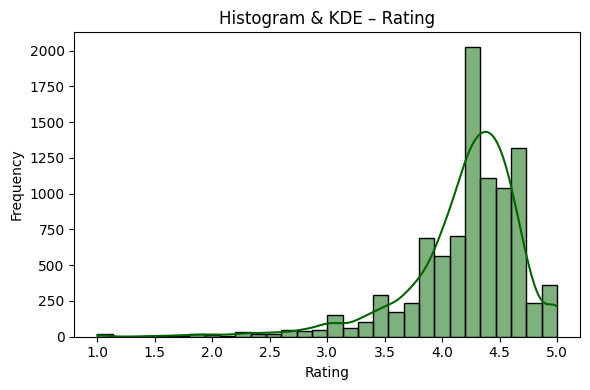

In [44]:
plt.figure(figsize=(6, 4))
sns.histplot(playstore['Rating'], bins=30, kde=True, color='darkgreen')
plt.title('Histogram & KDE – Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Histogram Rating (skala 1 – 5) menunjukkan **distribusi left-skewed**:  
- Puncak tajam di 4.3 – 4.5 → sebagian besar aplikasi mendapat rating tinggi.  
- Ekor panjang di kiri (≤ 3) → sedikit app yang bermasalah / berkualitas rendah.  

In [72]:
from scipy.stats import shapiro

stat, p = shapiro(np.random.choice(np.log1p(playstore['Reviews'].dropna()), 5000, replace=False))
print('W: ',stat)
print('p-value: ', p)

W:  0.9792600164576263
p-value:  2.0279054456739686e-26


Untuk menguji normalitas distribusi jumlah review yang telah ditransformasi dengan log(1 + Reviews), digunakan uji **Shapiro–Wilk** pada sampel acak sebanyak 5000 observasi. Fungsi shapiro() mengembalikan nilai statistik uji dan p-value. Karena p-value yang diperoleh adalah $\text{≈ 2,03 x }10^{-26}$ yang mana lebih kecil dari $\text{α = 0,05}$, maka hipotesis nol bahwa data mengikuti distribusi normal ditolak.

Meskipun nilai $\text{W ≈ 0,98}$ menunjukkan distribusi log(1 + Reviews) cukup dekat dengan normal, ukuran sampel yang sangat besar (n = 5000) membuat uji **Shapiro–Wilk** sangat sensitif sehingga penyimpangan kecil dari normalitas menghasilkan p-value yang sangat kecil. Karena p-value $< 0,05$, secara formal hipotesis nol “data benar-benar berdistribusi normal” ditolak, meskipun secara visual distribusi masih dapat dianggap mendekati normal untuk keperluan analisis.

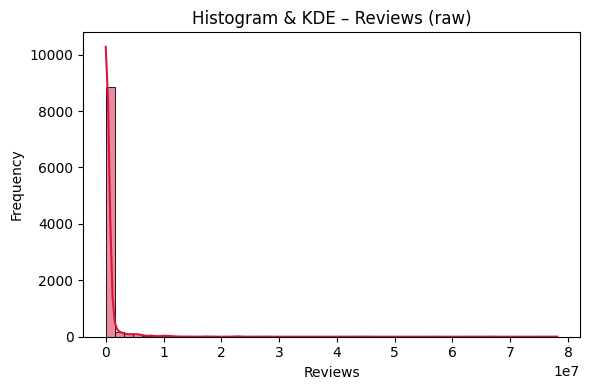

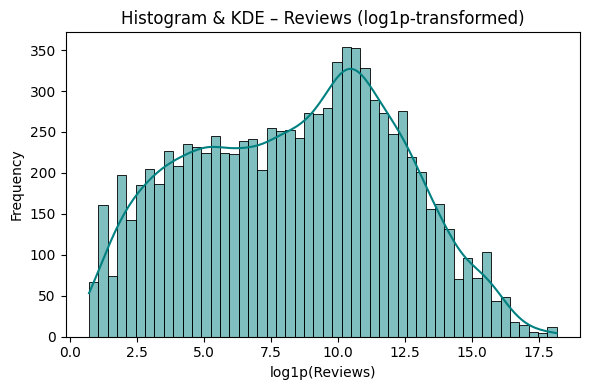

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(playstore['Reviews'], bins=50, kde=True, color='crimson')
plt.title('Histogram & KDE – Reviews (raw)')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(np.log1p(playstore['Reviews']), bins=50, kde=True, color='teal')
plt.title('Histogram & KDE – Reviews (log1p-transformed)')
plt.xlabel('log1p(Reviews)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [47]:
from scipy.stats import skew
print(skew(np.log1p(playstore['Reviews'].dropna())))

-0.04950235192376269


Setelah log1p-transform:  
- Bentuk mendekati **normal dengan sedikit right-skew**.  
- **Outlier sangat besar** (puluhan juta review) masih terlihat sebagai **tail tipis di kanan**, tetapi tidak lagi mendominasi visual.

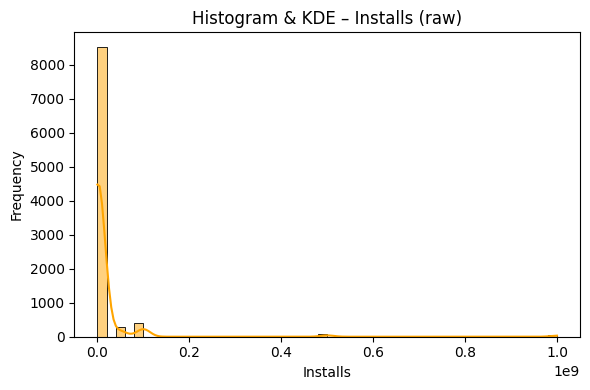

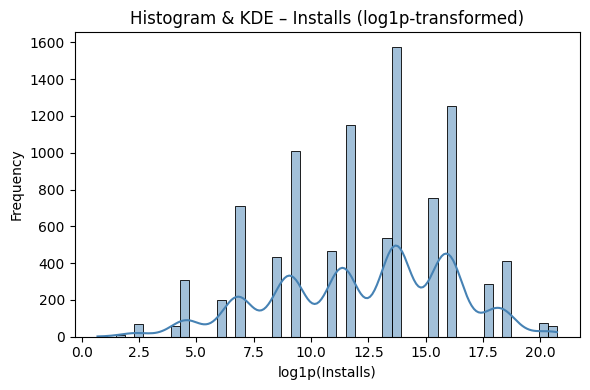

In [48]:
plt.figure(figsize=(6,4))
sns.histplot(playstore['Installs'], bins=50, kde=True, color='orange')
plt.title('Histogram & KDE – Installs (raw)')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(np.log1p(playstore['Installs']), bins=50, kde=True, color='steelblue')
plt.title('Histogram & KDE – Installs (log1p-transformed)')
plt.xlabel('log1p(Installs)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Ketika kita log-transform `Installs` dengan `log1p`, histogram hasilnya **masih tampak left-skewed (negatif)**.  
Hal ini **normal** dan bukan berarti transformasi gagal. Penyebab utamanya:



1. **Banyak aplikasi “sedang-populer”** (ratusan ribu sampai beberapa juta install) sehingga nilai log-nya menumpuk di bin tengah (sekitar 12-16).  
2. **Aplikasi super-populer** (≥ 100 juta) jumlahnya sedikit, sehingga nilai log ≥ 20 hanya sedikit dan membentuk ekor kanan yang pendek.  
3. **Aplikasi jarang di-install** (< 1 000) juga sedikit, sehingga tidak memunculkan ekor kiri yang panjang.

Jadi **puncak tajam di tengah + ekor pendek di kanan** menghasilkan skew negatif pada skala log.  
Yang penting, log-transform tetap **menekan outlier** dan **meringankan ekor panjang kanan** dibandingkan data mentah.

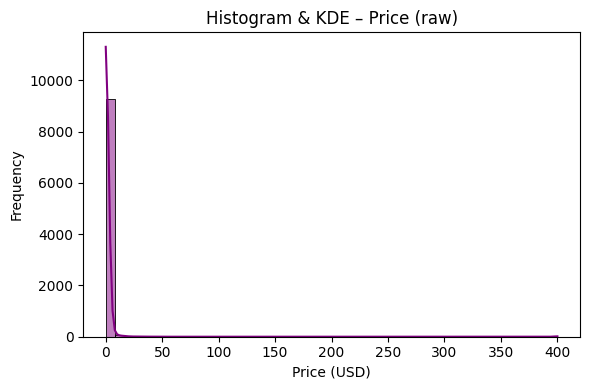

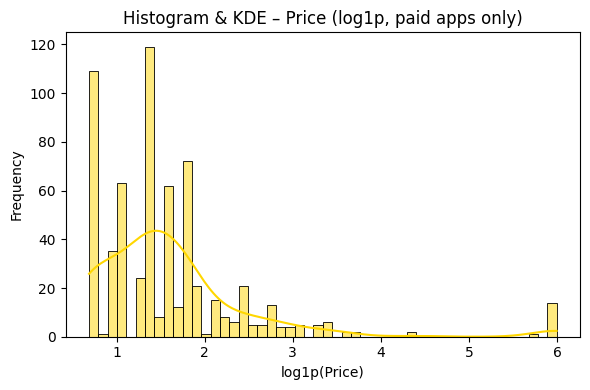

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(playstore['Price'], bins=50, kde=True, color='purple')
plt.title('Histogram & KDE – Price (raw)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

paid = playstore[playstore['Price'] > 0]['Price']
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(paid), bins=50, kde=True, color='gold')
plt.title('Histogram & KDE – Price (log1p, paid apps only)')
plt.xlabel('log1p(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Grafik raw → **tumpukan tinggi di \$0 (gratis)** + **tail tipis di kanan** hingga \$400.  
- Grafik log (paid-only) → **bell-shape right-skewed ringan**.  


# **3.0 PROBABILITY CALCULATION**
---


Pada bagian ini dilakukan perhitungan probabilitas empiris berdasarkan dataset Google Play Store.  
Probability dihitung sebagai proporsi (relative frequency) karena seluruh perhitungan menggunakan data observasi (empirical probability).





Variabel yang digunakan:
- **Rating** → variabel kontinu  
- **Installs**, **Reviews**, **Price** → numerik diskrit  
- **Category**, **Type (Free/Paid)** → variabel kategorikal  



Berikut perhitungan probabilitas yang wajib serta analisis tambahan berdasarkan joint, marginal, conditional, dan Bayes Rule.


---

### **HIGH RATING (≥ 4.5) PROBABILITY**

Menghitung probabilitas aplikasi memiliki rating tinggi (Rating ≥ 4.5).

<br>

$$
P(Rating \ge 4.5) = \frac{\text{Jumlah aplikasi dengan Rating ≥ 4.5}}{\text{Total aplikasi}}
$$

<br>

Perhitungan dilakukan untuk:
- Keseluruhan aplikasi  
- Aplikasi **Free**  
- Aplikasi **Paid**


In [50]:
p_high_rating = (playstore['Rating'] >= 4.5).mean()

free_apps = playstore[playstore['Type'] == 'Free']
paid_apps = playstore[playstore['Type'] == 'Paid']

p_high_rating_free = (free_apps['Rating'] >= 4.5).mean()
p_high_rating_paid = (paid_apps['Rating'] >= 4.5).mean()

print("all: ", p_high_rating)
print("free: ", p_high_rating_free)
print("paid: ", p_high_rating_paid)

all:  0.3155982905982906
free:  0.30671256454388984
paid:  0.4356589147286822


**Interpretasi:**
- Probabilitas sebuah aplikasi memiliki rating tinggi (≥ 4.5) sebesar `31.56%`, artinya sekitar 3 dari 10 aplikasi pada dataset tergolong memiliki kualitas rating yang sangat baik.
- Pada aplikasi **gratis (Free)**, probabilitas rating tinggi sedikit lebih rendah yaitu `30.67%`.
- Pada aplikasi **berbayar (Paid)**, probabilitas rating tinggi meningkat cukup signifikan menjadi `43.57%`.





Hasil ini menunjukkan bahwa **aplikasi berbayar cenderung memiliki peluang lebih besar untuk memperoleh rating tinggi dibandingkan aplikasi gratis**.


---


### **INSTALLS ≥ 1 MILLION PROBABILITY**

Probabilitas ini menyatakan peluang aplikasi memiliki jumlah instalasi minimal 1 juta.

<br>
$$
P(Installs \ge 1{,}000{,}000) = \frac{\text{Jumlah aplikasi dengan Installs ≥ 1 juta}}{\text{Total aplikasi}}
$$
<br>

Dihitung untuk:
- Keseluruhan aplikasi  
- Aplikasi **Free**  
- Aplikasi **Paid**

In [51]:
p_installs_high = (playstore['Installs'] >= 1_000_000).mean()
p_installs_free = (free_apps['Installs'] >= 1_000_000).mean()
p_installs_paid = (paid_apps['Installs'] >= 1_000_000).mean()

print("All: ", p_installs_high)
print("Free: ", p_installs_free)
print("Paid: ", p_installs_paid)

All:  0.47094017094017093
Free:  0.5026965002868617
Paid:  0.04186046511627907


**Interpretasi:**
- Probabilitas sebuah aplikasi memiliki jumlah instalasi ≥ **1 juta** sebesar `47.09%`, yang berarti hampir **setengah dari aplikasi** dalam dataset tergolong populer.
- Pada aplikasi **gratis (Free)**, probabilitas instalasi ≥ 1 juta meningkat menjadi `50.27%`, menunjukkan bahwa **aplikasi gratis lebih mudah menjangkau pengguna dalam jumlah besar**.
- Pada aplikasi **berbayar (Paid)**, probabilitas instalasi ≥ 1 juta hanya `4.19%`, yang menunjukkan bahwa **sangat sedikit aplikasi berbayar yang mencapai tingkat popularitas tinggi berdasarkan jumlah unduhan**.




Hasil ini mengindikasikan bahwa **model aplikasi gratis jauh lebih efektif dalam menarik jumlah pengguna besar dibandingkan aplikasi berbayar**.


---

### **CONDITIONAL PROBABILITY: INSTALLS ≥ 1 MILLION | CATEGORY = GAME**




Probabilitas bersyarat untuk aplikasi kategori GAME memiliki instalasi minimal 1 juta.

<br>
$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$
<br>





Dengan:
- A = Installs ≥ 1 juta  
- B = Category = GAME  


$$
P(Installs \ge 1M \mid GAME)
$$
<br>

In [52]:
game_apps = playstore[playstore['Category'] == 'GAME']
p_installs_1m_given_game = (game_apps['Installs'] >= 1_000_000).mean()

print("probability: ", p_installs_1m_given_game)

probability:  0.6718322698268003


**Interpretasi:** <br>
Probabilitas aplikasi **kategori GAME** memiliki jumlah instalasi ≥ **1 juta** sebesar `67.18%`. Artinya, **sekitar dua dari tiga aplikasi game** dalam dataset tergolong sangat populer berdasarkan jumlah unduhan.



Nilai ini jauh lebih tinggi dibandingkan probabilitas keseluruhan aplikasi, yang menunjukkan bahwa **kategori GAME merupakan salah satu kategori dengan tingkat popularitas tertinggi di Google Play Store**.


---



### **CONDITIONAL PROBABILITY: HIGH RATING | PAID AND FREE**

Probabilitas bersyarat rating tinggi berdasarkan jenis aplikasi:

$
P(Rating \ge 4.5 \mid Paid)
$
<br>
$
P(Rating \ge 4.5 \mid Free)
$
<br>

In [53]:
p_high_given_paid = (paid_apps['Rating'] >= 4.5).mean()
p_high_given_free = (free_apps['Rating'] >= 4.5).mean()

print("Paid: ", p_high_given_paid)
print("Free: ", p_high_given_free)

Paid:  0.4356589147286822
Free:  0.30671256454388984


**Interpretasi:**
- Probabilitas aplikasi **berbayar (Paid)** memiliki rating tinggi (≥ 4.5) sebesar `43.57%`, yang berarti hampir **4 dari 10 aplikasi berbayar** memiliki kualitas rating sangat baik.
- Probabilitas aplikasi **gratis (Free)** memiliki rating tinggi sebesar `30.67%`.





Perbedaan ini menunjukkan bahwa **aplikasi berbayar cenderung memiliki peluang lebih besar untuk memperoleh rating tinggi dibandingkan aplikasi gratis**.


---


### **JOINT PROBABILITY**



Probabilitas gabungan menunjukkan peluang dua kejadian terjadi secara bersamaan.

$$
P(A \cap B)
$$

Contoh:
$$
P(Rating \ge 4.5 \cap Installs \ge 1{,}000{,}000)
$$
<br>


In [54]:
p_joint_high_install = (
    (playstore['Rating'] >= 4.5) &
    (playstore['Installs'] >= 1_000_000)
).mean()

p_joint_high_install


np.float64(0.14348290598290597)

**Interpretasi:** <br>
Probabilitas sebuah aplikasi memiliki **rating tinggi (≥ 4.5)** sekaligus **jumlah instalasi ≥ 1 juta** sebesar `14.35%`. Artinya, hanya sekitar **14 dari 100 aplikasi** yang dapat dikategorikan sebagai aplikasi dengan **kualitas tinggi sekaligus sangat populer**.




Hasil ini menunjukkan bahwa **tidak semua aplikasi dengan rating tinggi otomatis memiliki jumlah unduhan yang besar**, dan sebaliknya.


---


### **JOINT, MARGINAL, AND CONDITIONAL (HIGH RATING & PAID)**

Didefinisikan:
- A = Rating ≥ 4.5  
- B = Paid  




Marginal:
$
P(A), \quad P(B)
$

Joint:
$
P(A \cap B)
$

Conditional:
$
P(A \mid B), \quad P(B \mid A)
$

In [55]:
A = playstore['Rating'] >= 4.5
B = playstore['Type'] == 'Paid'

pA = A.mean()
pB = B.mean()
pAandB = (A & B).mean()

pAgivenB = pAandB / pB
pBgivenA = pAandB / pA

pA, pB, pAandB, pAgivenB, pBgivenA


(np.float64(0.3155982905982906),
 np.float64(0.06891025641025642),
 np.float64(0.030021367521367522),
 np.float64(0.4356589147286822),
 np.float64(0.09512525389302641))

**Interpretasi:**





- **P(A) = `31.56%`** → Probabilitas sebuah aplikasi memiliki **rating tinggi (≥ 4.5)**.
- **P(B) = `6.89%`** → Probabilitas sebuah aplikasi merupakan **aplikasi berbayar (Paid)**.
- **P(A ∩ B) = `3.00%`** → Probabilitas sebuah aplikasi **berbayar sekaligus memiliki rating tinggi**.

- **P(A | B) = `43.57%`** → Jika diketahui sebuah aplikasi **berbayar**, maka peluang aplikasi tersebut memiliki **rating tinggi** adalah sekitar **`43.57%`**.
- **P(B | A) = `9.51%`** → Jika diketahui sebuah aplikasi memiliki **rating tinggi**, maka peluang aplikasi tersebut merupakan **aplikasi berbayar** hanya sekitar **`9.51%`**.



Hasil ini menunjukkan bahwa meskipun aplikasi berbayar cenderung memiliki rating yang lebih tinggi, **mayoritas aplikasi dengan rating tinggi tetap berasal dari aplikasi gratis**.


---

### **INDEPENDENCY TEST (HIGH RATING & PAID)**

Dua kejadian dikatakan independen jika:

$$
P(A \cap B) = P(A) \cdot P(B)
$$
<br>

In [56]:
is_independent = np.isclose(pAandB, pA * pB)
pA * pB, pAandB, is_independent


(np.float64(0.021747959127766822), np.float64(0.030021367521367522), np.False_)

**Interpretasi:** <br>
Hasil perhitungan menunjukkan bahwa:




- Nilai **P(A) × P(B) = `2.17%`**
- Nilai **P(A ∩ B) = `3.00%`**
- Karena **P(A ∩ B) ≠ P(A) × P(B)** dan hasil uji bernilai **False**, maka dapat disimpulkan bahwa **kejadian “aplikasi berbayar” dan “rating tinggi” tidak bersifat independen**.



Artinya, **status aplikasi (Free/Paid) memiliki pengaruh terhadap peluang aplikasi memperoleh rating tinggi**.


---

### **BAYES RULE: P(PAID | HIGH RATING)**

Teorema Bayes:

$$
P(B \mid A) = \frac{P(A \mid B) \cdot P(B)}{P(A)}
$$
<br>

In [57]:
bayes_paid_given_high = (pAgivenB * pB) / pA
bayes_paid_given_high


np.float64(0.09512525389302642)

**Interpretasi (Bayes Rule):**
Probabilitas sebuah aplikasi merupakan **aplikasi berbayar (Paid)** jika diketahui memiliki **rating tinggi (≥ 4.5)** adalah sebesar **`9.51%`**.


Artinya, meskipun aplikasi berbayar cenderung memiliki rating tinggi, **sebagian besar aplikasi dengan rating tinggi tetap didominasi oleh aplikasi gratis**.


---


### **RATING INTERVAL PROBABILITY (4.0 – 4.5)**

Karena Rating dianggap sebagai variabel kontinu, maka probabilitas intervalnya adalah:

$$
P(4.0 \le X \le 4.5)
$$

In [58]:
p_range = (
    (playstore['Rating'] >= 4.0) &
    (playstore['Rating'] <= 4.5)
).mean()

p_range


np.float64(0.5818376068376069)

**Interpretasi:**
Probabilitas sebuah aplikasi memiliki rating pada rentang **4.0 hingga 4.5** sebesar **`58.18%`**. Artinya, **lebih dari setengah aplikasi** dalam dataset memiliki rating yang tergolong **baik hingga sangat baik**, meskipun belum masuk kategori rating sangat tinggi (≥ 4.5).


---




### **POPULAR APPS PROBABILITY**

Aplikasi populer didefinisikan sebagai:

- Rating ≥ 4.3  
- Installs ≥ 1 juta  
- Reviews ≥ 50.000  

$$
P(\text{Popular})
$$
<br>


In [59]:
popular_mask = (
    (playstore['Rating'] >= 4.3) &
    (playstore['Installs'] >= 1_000_000) &
    (playstore['Reviews'] >= 50_000)
)

p_popular = popular_mask.mean()
p_popular


np.float64(0.2123931623931624)

**Interpretasi:** <br>
Probabilitas sebuah aplikasi dapat dikategorikan sebagai **aplikasi populer** (Rating ≥ 4.3, Installs ≥ 1 juta, dan Reviews ≥ 50.000) sebesar **`21.24%`**. Artinya, hanya sekitar **2 dari 10 aplikasi** dalam dataset yang benar-benar memenuhi kriteria **populer dari sisi kualitas dan popularitas pengguna**.


---




### **SUMMARY**




Berdasarkan seluruh perhitungan probabilitas yang telah dilakukan, dapat disimpulkan bahwa **aplikasi gratis (Free) mendominasi jumlah pengguna dan popularitas berdasarkan jumlah instalasi**, terlihat dari tingginya probabilitas aplikasi free mencapai ≥ 1 juta unduhan (≈ `50%`). Namun, dari sisi **kualitas berdasarkan rating**, **aplikasi berbayar (Paid) memiliki peluang lebih besar untuk memperoleh rating tinggi**, dengan probabilitas mencapai sekitar `43.57%`.


Meskipun demikian, hasil Bayes menunjukkan bahwa **sebagian besar aplikasi dengan rating tinggi tetap berasal dari aplikasi gratis**, karena jumlah aplikasi free jauh lebih banyak di dalam dataset. Selain itu, hanya sekitar **`21%` aplikasi yang benar-benar dapat dikategorikan sebagai aplikasi populer** (memenuhi syarat rating tinggi, instalasi besar, dan jumlah ulasan tinggi).

Secara keseluruhan, hasil ini menunjukkan bahwa **popularitas tidak selalu berbanding lurus dengan kualitas**, dan **model gratis lebih unggul dalam menjangkau pengguna, sedangkan model berbayar lebih unggul dalam kualitas rating**.


---


# **4.0 SAMPLING DISTRIBUTION & CLT**


---


### **SAMPLING DISTRIBUTION - MEAN RATING**

Pada analisis ini dilakukan simulasi distribusi sampling dari rata-rata (sampling distribution of the mean) pada data rating aplikasi Google Play Store dengan ukuran sampel n = 30, 50, 100, dan 200, masing-masing diulang sebanyak 1000 kali pengambilan sampel acak dengan pengembalian. Untuk setiap sampel dihitung nilai rata-rata, kemudian disusun distribusi sampling mean-nya.

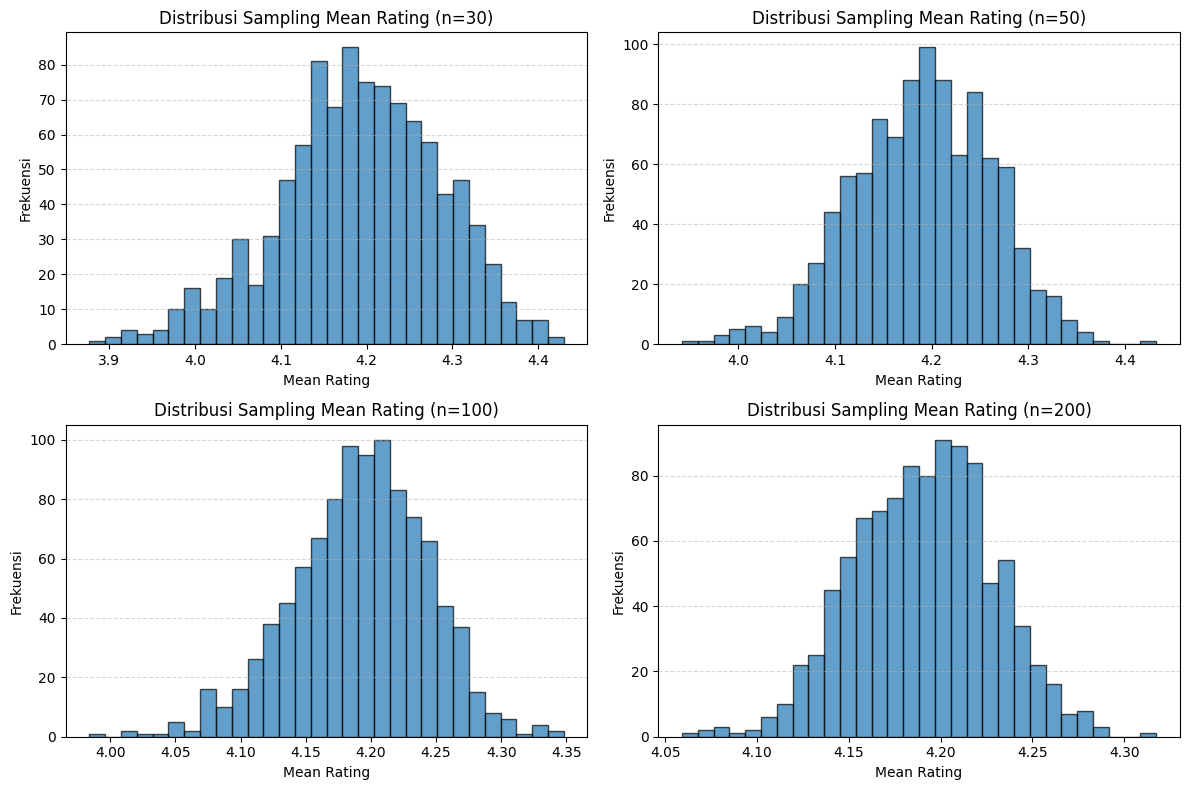

In [60]:
from scipy.stats import sem

rating = playstore['Rating'].dropna()

sample_sizes = [30, 50, 100, 200]
results = {}

for n in sample_sizes:
    sample_means = []
    for _ in range(1000):
        samp = np.random.choice(rating, size=n, replace=True)
        sample_means.append(samp.mean())

    results[n] = {
        'means': np.array(sample_means),
        'mean_of_means': np.mean(sample_means),
        'std_error': sem(sample_means)
    }

plt.figure(figsize=(12, 8))
for i, n in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)
    plt.hist(results[n]['means'], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribusi Sampling Mean Rating (n={n})')
    plt.xlabel('Mean Rating')
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Hasil histogram menunjukkan bahwa semakin besar ukuran sampel, distribusi sampling mean semakin mendekati distribusi normal dan semakin sempit, serta nilai rata-rata hasil sampling semakin terkonsentrasi di sekitar mean populasi. Hal ini membuktikan berlakunya Central Limit Theorem (CLT) secara empiris pada data rating aplikasi.

Selain itu, nilai standard error semakin kecil seiring bertambahnya ukuran sampel, yang menandakan bahwa akurasi estimasi mean meningkat ketika jumlah data dalam sampel diperbesar.

### **STANDARD ERROR AND CONFIDENCE INTERVAL (95%)**

Untuk mengukur **ketelitian estimasi rata-rata sampel terhadap rata-rata populasi**, digunakan ukuran **standard error (SE)** dan **confidence interval (CI)**. Standard error menunjukkan tingkat penyebaran rata-rata sampel, yang dirumuskan sebagai:

$$
SE = \frac{s}{\sqrt{n}}
$$

dengan:
- $s $ = standar deviasi sampel  
- $ n $ = ukuran sampel  

Selanjutnya, **interval kepercayaan 95%** untuk mean populasi dihitung menggunakan distribusi *t-Student*, dengan rumus:

$$
CI = \bar{x} \pm t_{(0.025, \, n-1)} \times SE
$$

di mana:
* $\bar{x}$ = **mean** hasil *sampling*
* $t_{(0.025, \, n-1)}$ = **nilai kritis distribusi t**
* $SE$ = **standard error**

In [61]:
from scipy.stats import t

for n in sample_sizes:
    mean = results[n]['mean_of_means']
    se = results[n]['std_error']
    ci = t.interval(0.95, df=n-1, loc=mean, scale=se)
    print(f"n={n}: Mean={mean:.3f}, SE={se:.3f}, 95% CI={ci}")


n=30: Mean=4.192, SE=0.003, 95% CI=(np.float64(4.1861413197025), np.float64(4.198405346964165))
n=50: Mean=4.190, SE=0.002, 95% CI=(np.float64(4.185581688469587), np.float64(4.194614311530413))
n=100: Mean=4.192, SE=0.002, 95% CI=(np.float64(4.1886328229332515), np.float64(4.19511917706675))
n=200: Mean=4.191, SE=0.001, 95% CI=(np.float64(4.188402534732581), np.float64(4.193103465267419))


Berdasarkan hasil perhitungan, nilai mean rating hasil sampling berada konsisten di sekitar 4,19 untuk seluruh ukuran sampel (n = 30, 50, 100, 200). Nilai standard error (SE) semakin kecil seiring bertambahnya ukuran sampel, dari 0,003 pada n=30 hingga 0,001 pada n=200, yang menunjukkan bahwa estimasi mean semakin presisi.

Interval kepercayaan `95%` (Confidence Interval) yang dihasilkan juga semakin sempit pada sampel yang lebih besar, misalnya dari kisaran (4,187 – 4,199) pada n=30 menjadi (4,189 – 4,194) pada n=200. Hal ini menunjukkan bahwa semakin besar ukuran sampel, semakin tinggi tingkat keyakinan terhadap estimasi mean rating populasi.

### **PROPORTION OF HIGH RATING (≥ 4.5)**



Pada bagian ini dilakukan analisis **proporsi aplikasi yang memiliki rating tinggi (≥ 4.5)** menggunakan pendekatan **distribusi sampling proporsi**. Setiap data rating dikonversi menjadi data biner, yaitu:
- Bernilai **1** jika rating ≥ 4.5  
- Bernilai **0** jika rating < 4.5  

Proporsi sampel dihitung menggunakan rumus:

$$
\hat{p} = \frac{x}{n}
$$

dengan:
- $ \hat{p} $ = proporsi sampel  
- $ x $ = jumlah aplikasi dengan rating ≥ 4.5 dalam sampel  
- $ n $ = ukuran sampel  

Standard error untuk proporsi dihitung dengan rumus:

$$
SE_{\hat{p}} = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

Proses sampling dilakukan sebanyak **1000 kali** untuk setiap ukuran sampel (n = 30, 50, 100, 200) agar diperoleh **distribusi sampling proporsi** yang dapat dianalisis kestabilannya.

In [62]:
high_rating = (rating >= 4.5).astype(int)

prop_results = {}
for n in sample_sizes:
    props = []
    for _ in range(1000):
        samp = np.random.choice(high_rating, size=n, replace=True)
        props.append(samp.mean())

    prop_results[n] = {
        'props': np.array(props),
        'mean_prop': np.mean(props),
        'se_prop': sem(props)
    }


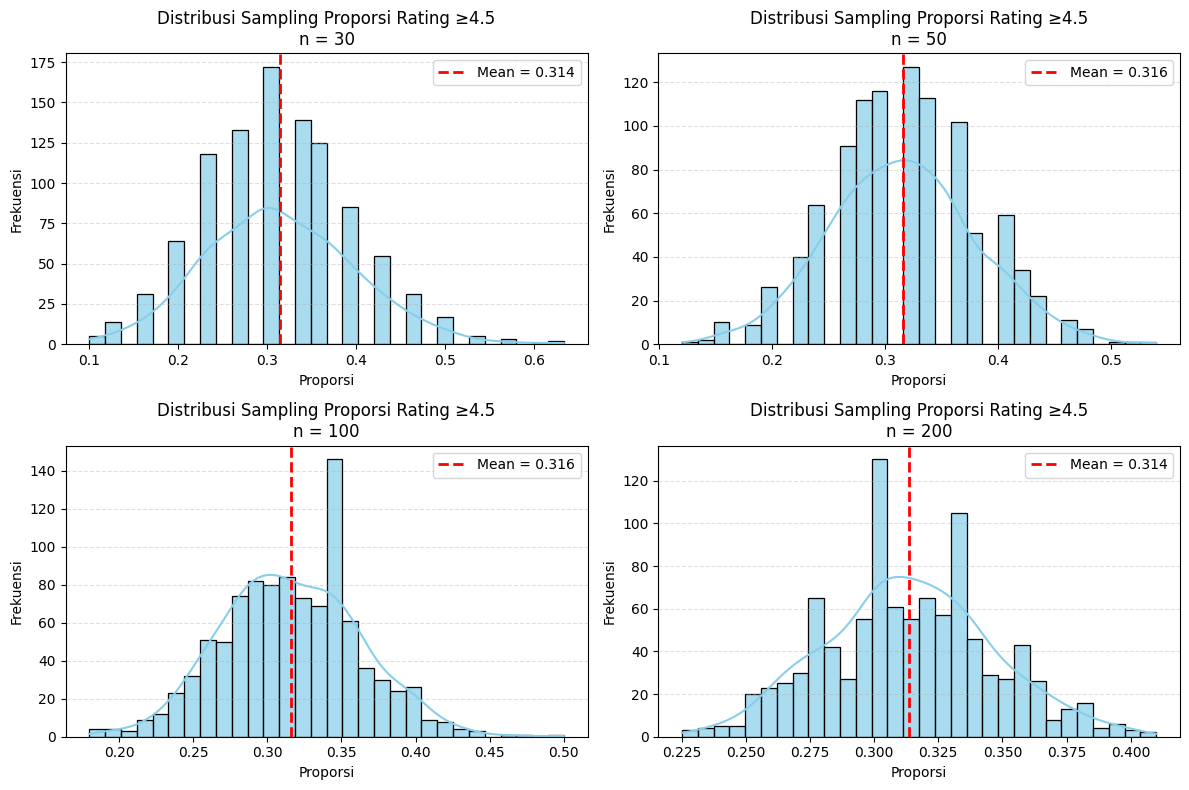

In [63]:
plt.figure(figsize=(12, 8))
for i, n in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)

    sns.histplot(prop_results[n]['props'],
                 bins=30,
                 kde=True,
                 color='skyblue',
                 edgecolor='black',
                 alpha=0.7)

    plt.axvline(prop_results[n]['mean_prop'],
                color='red',
                linestyle='--',
                linewidth=2,
                label=f"Mean = {prop_results[n]['mean_prop']:.3f}")

    plt.title(f'Distribusi Sampling Proporsi Rating ≥4.5\nn = {n}', fontsize=12)
    plt.xlabel('Proporsi')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Berdasarkan hasil simulasi distribusi sampling proporsi rating ≥ 4.5, diperoleh bahwa nilai **rata-rata proporsi** berada di sekitar **0,31–0,32** untuk seluruh ukuran sampel (n = 30, 50, 100, 200). Hal ini menunjukkan bahwa sekitar **31% aplikasi** dalam populasi memiliki rating tinggi (≥ 4.5).

Selain itu, terlihat bahwa **semakin besar ukuran sampel, sebaran distribusi semakin sempit**, yang menandakan bahwa **nilai proporsi semakin stabil dan presisi**. Pada n kecil, variasi proporsi masih relatif lebar, sedangkan pada n besar variasi tersebut semakin mengecil. Hasil ini menunjukkan bahwa **distribusi sampling proporsi juga mengikuti prinsip Central Limit Theorem (CLT)**, di mana distribusi mendekati normal saat ukuran sampel meningkat.


### **CONFIDENCE INTERVAL FOR PROPORTION**


Setelah diperoleh nilai proporsi rata-rata aplikasi dengan rating ≥ 4.5, langkah selanjutnya adalah menentukan **interval kepercayaan (confidence interval) 95% untuk proporsi populasi**. Interval ini digunakan untuk menunjukkan **rentang nilai proporsi sebenarnya di populasi dengan tingkat keyakinan 95%**.

Interval kepercayaan untuk proporsi dihitung menggunakan pendekatan distribusi normal dengan rumus:

$$
CI = \hat{p} \pm z_{0.025} \cdot SE_{\hat{p}}
$$

dengan:
- $ \hat{p} $ = proporsi hasil sampling  
- $ z_{0.025} = 1.96 $ (untuk 95%)  
- $ SE_{\hat{p}} $ = standard error proporsi  

In [64]:
for n in sample_sizes:
    p = prop_results[n]['mean_prop']
    se = prop_results[n]['se_prop']
    ci = p + np.array([-1.96, 1.96]) * se
    print(f"n={n}: Prop={p:.3f}, SE={se:.3f}, 95% CI={ci}")

n=30: Prop=0.314, SE=0.003, 95% CI=[0.30889743 0.31936924]
n=50: Prop=0.316, SE=0.002, 95% CI=[0.31148303 0.31951697]
n=100: Prop=0.316, SE=0.001, 95% CI=[0.3132164 0.3190036]
n=200: Prop=0.314, SE=0.001, 95% CI=[0.31147991 0.31554009]


Berdasarkan hasil perhitungan, diperoleh bahwa nilai **proporsi aplikasi dengan rating ≥ 4.5 berada di kisaran 0,31–0,32** untuk seluruh ukuran sampel. Interval kepercayaan 95% yang dihasilkan semakin **sempit seiring bertambahnya ukuran sampel**, misalnya dari sekitar **[0,312 – 0,323] pada n = 30** menjadi **[0,314 – 0,318] pada n = 200**.

Hal ini menunjukkan bahwa **semakin besar ukuran sampel, semakin tinggi tingkat presisi estimasi proporsi populasi**, serta memperkuat bahwa sekitar **31% aplikasi dalam populasi memiliki rating tinggi (≥ 4.5)**.


# **5.0 HYPOTHESIS TESTING**
---

## **PROPORTION OF HIGH RATING: FREE VS PAID**

> ***Apakah aplikasi berbayar memang lebih sering (atau justru lebih jarang) mencapai rating sangat tinggi dibandingkan aplikasi gratis, atau sebenarnya tidak ada perbedaan proporsi di antara keduanya?***

Untuk membandingkan proporsi aplikasi dengan rating tinggi (Rating ≥ 4.5) antara aplikasi gratis dan berbayar, dilakukan uji hipotesis dua sampel dengan rumusan:

$$
\text{H₀: }p_{free} = p_{paid}
$$
$$
\text{H₁: }p_{free} ≠ p_{paid}
$$

di mana $p_{free}$ dan $p_{paid}$ adalah proporsi aplikasi dengan rating ≥ 4.5 pada aplikasi Free dan Paid.

In [65]:
playstore['high_rating'] = (playstore['Rating'] >= 4.5)

Uji dilakukan menggunakan two-sample proportion z-test dengan statistik uji:

$$
Z=\frac{({p̂}_{1}-{p̂}_{2})}{\sqrt{{p̂}(1-{p̂})(\frac{1}{n_{1}}+\frac{1}{n_{2}})}}
$$

$
Z: \text{z-statistic}
$

$
{p̂}_{1}: \text{sample proportions aplikasi high rating pada aplikasi free}
$

$
{p̂}_{2}: \text{sample proportions aplikasi high rating pada aplikasi paid}
$

$
x_{1},x_{2}: \text{banyaknya aplikasi high rating pada aplikasi free dan paid}
$

$
n_{1},n_{2}: \text{total aplikasi pada free dan paid}
$

$
p̂: \text{pooled proportion dari kedua sample = } \frac{x_{1} + x_{2}}{n_{1} + n_{2}}
$


In [66]:
free_high = playstore[(playstore['Type'] == 'Free') & (playstore['high_rating'])].shape[0]
free_total = playstore[playstore['Type'] == 'Free'].shape[0]

paid_high = playstore[(playstore['Type'] == 'Paid') & (playstore['high_rating'])].shape[0]
paid_total = playstore[playstore['Type'] == 'Paid'].shape[0]

print(free_high, free_total, paid_high, paid_total)

2673 8715 281 645


Dari data tersebut diperoleh:

$
x_{1} = 2673
$

$
n_{1} = 8713
$

$
x_{2} = 281
$

$
n_{2} = 645
$

Sehingga,

$
p̂_{1} ≈ 0.31\text{ dan }p̂_{2} ≈ 0.44
$

In [67]:
from statsmodels.stats.proportion import proportions_ztest

counts = [free_high, paid_high]
nobs   = [free_total, paid_total]

z_stat, p_value = proportions_ztest(counts, nobs)
print("z-stat =", z_stat)
print("p-value =", p_value)

z-stat = -6.79926266247195
p-value = 1.0515594425826617e-11


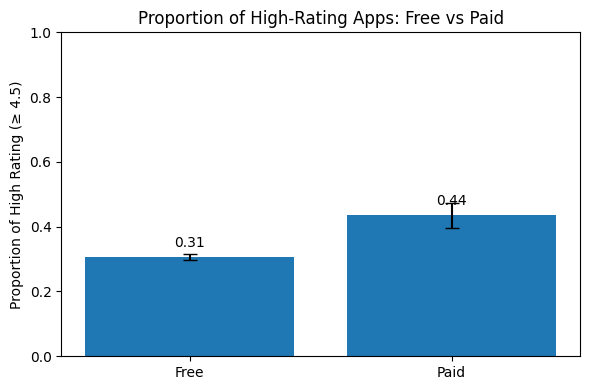

In [68]:
free_prop = free_high / free_total
paid_prop = paid_high / paid_total

free_se = np.sqrt(free_prop * (1 - free_prop) / free_total)
paid_se = np.sqrt(paid_prop * (1 - paid_prop) / paid_total)

prop_df = pd.DataFrame({
    'Type': ['Free', 'Paid'],
    'Prop_high': [free_prop, paid_prop],
    'SE': [free_se, paid_se]
})

plt.figure(figsize=(6, 4))

plt.bar(
    prop_df['Type'],
    prop_df['Prop_high'],
    yerr=1.96 * prop_df['SE'],
    capsize=5
)

plt.ylim(0, 1)
plt.ylabel('Proportion of High Rating (≥ 4.5)')
plt.title('Proportion of High-Rating Apps: Free vs Paid')

for i, row in prop_df.iterrows():
    plt.text(
        i,
        row['Prop_high'] + 0.03,
        f"{row['Prop_high']:.2f}",
        ha='center'
    )

plt.tight_layout()
plt.show()

Hasil perhitungan memberikan nilai $Z ≈ -6.80$ dengan *p-value* dua sisi $≈ 1.05 \text{ x } 10^{-11}$, yang jauh lebih kecil daripada taraf signifikansi
$α = 0.05$.

Dengan demikian, H₀ ditolak, sehingga terdapat bukti statistik yang sangat kuat bahwa proporsi aplikasi dengan rating tinggi (≥ 4.5) berbeda antara aplikasi gratis dan berbayar.

Dilihat dari nilai proporsinya, aplikasi berbayar memiliki proporsi high rating yang lebih besar (≈ 43.6%) dibandingkan aplikasi gratis (≈ 30.7%), sehingga aplikasi berbayar cenderung lebih sering mencapai rating sangat tinggi.

---

## **GAME CATEGORY AVERAGE RATING**

> ***Apakah kategori GAME benar-benar memiliki rating yang secara signifikan lebih tinggi dari rating rata-rata 4.2?***

Pada pengujian ini, fokus analisis adalah kategori GAME. Nilai 4.2 dipilih sebagai nilai acuan karena mendekati rata-rata rating keseluruhan aplikasi di dataset dan dapat dianggap sebagai tingkat kualitas “standar” di Google Play Store.

$$
\text{H₀: μ GAME = 4.2}
$$
$$
\text{H₁: μ GAME > 4.2}
$$

Hipotesis nol $H_{0}$ menyatakan bahwa rata-rata rating aplikasi kategori GAME sama dengan 4.2, sehingga kualitas kategori GAME tidak lebih baik maupun lebih buruk dari rata-rata umum.

Sebaliknya, hipotesis alternatif $H_{1}$ menyatakan bahwa rata-rata rating kategori GAME lebih tinggi dari 4.2 $\text{(μ GAME > 4,2)}$ yang berarti aplikasi GAME secara rata-rata memiliki kualitas yang lebih baik daripada standar tersebut.

In [69]:
game_rating = playstore[playstore['Category'] == 'GAME']['Rating'].dropna()

Uji dilakukan menggunakan ***one-sample t-test*** dengan nilai acuan 4.2.

$$
t=\frac{({x̄}-\mu)}{(\frac{s}{\sqrt{n}})}
$$

$
t\text{ = t-statistics}
$

$
x̄\text{ = sample mean}
$

$
μ\text{ = population mean}
$

$
s\text{ = sample standard deviation}
$

$
n\text{ = sample size}
$


In [70]:
from scipy import stats

t_stat, p_two_sided = stats.ttest_1samp(game_rating, popmean=4.2)

if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - p_two_sided / 2

print("t-stat =", t_stat)
print("p-value (one-sided) =", p_one_sided)

t-stat = 7.825420289773587
p-value (one-sided) = 5.9294303264309445e-15


Hasil perhitungan memberikan nilai *t-stat* $≈ 7.83$ dengan *p-value one sided* $≈ 5.93 \text{ x } 10^{-15}$, yang jauh lebih kecil daripada taraf signifikansi $α = 0.05$.

Dengan demikian, **H₀ ditolak**, sehingga terdapat bukti statistik bahwa rata-rata rating aplikasi kategori GAME lebih tinggi dari 4.2. Nilai *t-stat* yang positif besar mendukung kesimpulan bahwa kategori GAME cenderung memiliki rata-rata rating di atas 4.2.

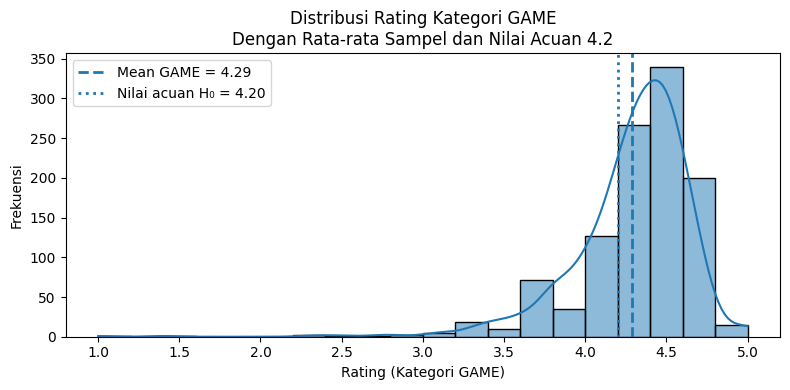

In [71]:
game_rating = playstore.loc[playstore['Category'] == 'GAME', 'Rating'].dropna()

mean_game = game_rating.mean()
null_mean = 4.2

plt.figure(figsize=(8, 4))

sns.histplot(game_rating, bins=20, kde=True)
plt.xlabel('Rating (Kategori GAME)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rating Kategori GAME\nDengan Rata-rata Sampel dan Nilai Acuan 4.2')

plt.axvline(mean_game, linestyle='--', linewidth=2, label=f'Mean GAME = {mean_game:.2f}')

plt.axvline(null_mean, linestyle=':', linewidth=2, label='Nilai acuan H₀ = 4.20')

plt.legend()
plt.tight_layout()
plt.show()

Grafik di atas memperlihatkan **distribusi rating aplikasi kategori GAME.** Garis putus-putus menunjukkan rata-rata rating sampel kategori GAME $\text{(≈ μ GAME)}$, sedangkan garis titik-titik menunjukkan nilai acuan hipotesis 4.2.

Terlihat bahwa rata-rata rating GAME berada di sebelah kanan 4.2, konsisten dengan hasil t-test yang menunjukkan bahwa rata-rata rating GAME tidak lebih rendah dari 42 dan justru cenderung lebih tinggi.

---

## **CATEGORIES AVERAGE RATING**

> ***Apakah rata-rata rating berbeda signifikan antar beberapa kategori aplikasi besar di Google Play Store?***

Misalkan kita pilih 4 kategori:

**K₁ = GAME**

**K₂ = FAMILY**

**K₃ = TOOLS**

**K₄ = PRODUCTIVITY**

Dengan $\text{μ₁, μ₂, μ₃, μ₄ = rata-rata rating masing-masing kategori.}$

$$
H_0​​​:μ1​=μ2​=μ3​=μ4​
$$
$$
H_1:\text{Minimal ada satu }μ_k\text{​ yang berbeda​}
$$

Uji hipotesis dilakukan menggunakan **one-way ANOVA** untuk membandingkan rata-rata rating beberapa kategori besar, yaitu **GAME, FAMILY, TOOLS, dan PRODUCTIVITY**. Setiap kelompok berisi rating aplikasi pada kategori tersebut setelah proses data cleaning.

In [73]:
from scipy import stats

target_cats = ['GAME', 'FAMILY', 'TOOLS', 'PRODUCTIVITY']

subset = playstore[playstore['Category'].isin(target_cats)]

groups = []
for cat in target_cats:
    grp = subset.loc[subset['Category'] == cat, 'Rating'].dropna()
    groups.append(grp)
    print(cat, "n =", len(grp), "mean =", grp.mean())

f_stat, p_value = stats.f_oneway(*groups)
print("F-stat =", f_stat)
print("p-value =", p_value)

GAME n = 1097 mean = 4.286326344576117
FAMILY n = 1746 mean = 4.192382588774342
TOOLS n = 733 mean = 4.047203274215553
PRODUCTIVITY n = 351 mean = 4.211396011396012
F-stat = 34.24483190995591
p-value = 7.674036581286792e-22


Hasil perhitungan **ANOVA** memberikan nilai $F ≈ 34,2$ dengan $\text{p-value ≈ 7,7 x }10^{-22}$. Dengan taraf signifikansi $α=0,05$, karena p-value lebih kecil dari $0,05$, maka:

Karena $\text{p-value < 0,05}$, maka **H₀ ditolak**. Terdapat bukti statistik bahwa rata-rata rating tidak sama antar kategori (minimal ada satu kategori yang memiliki rata-rata rating yang berbeda signifikan dibanding kategori lainnya).

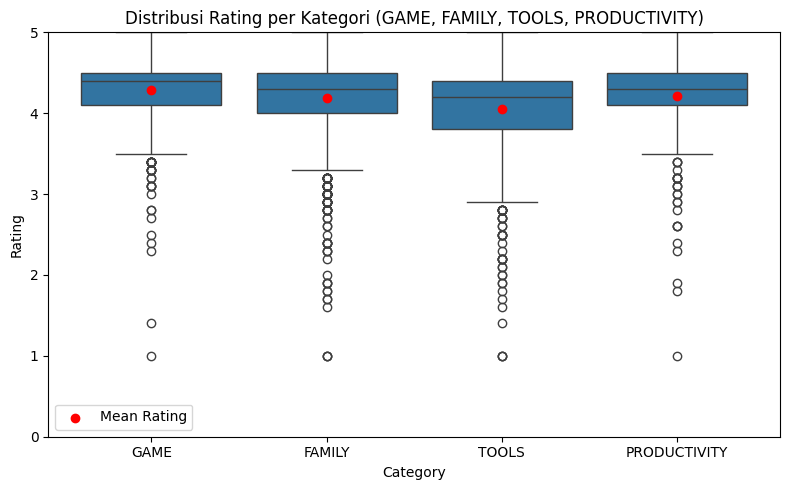

In [74]:
target_cats = ['GAME', 'FAMILY', 'TOOLS', 'PRODUCTIVITY']

subset = playstore[playstore['Category'].isin(target_cats)].copy()
subset = subset.dropna(subset=['Rating'])

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=subset,
    x='Category',
    y='Rating',
    order=target_cats
)

cat_means = subset.groupby('Category')['Rating'].mean().reindex(target_cats)
plt.scatter(
    x=range(len(target_cats)),
    y=cat_means.values,
    color='red',
    zorder=5,
    label='Mean Rating'
)

plt.ylim(0, 5)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Distribusi Rating per Kategori (GAME, FAMILY, TOOLS, PRODUCTIVITY)')
plt.legend()
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan distribusi rating aplikasi untuk kategori **GAME, FAMILY, TOOLS, dan PRODUCTIVITY** dalam bentuk boxplot.

Dari analisis tersebut, dapat terlihat bahwasanya kategori **GAME** memiliki rata-rata rating paling tinggi dibandingkan dengan kategori lainnya.

# **6.0 SUMMARY**

Berdasarkan analisis statistik dan probabilitas pada dataset Google Play Store, dapat disimpulkan beberapa hal utama sebagai berikut:


1. **Gambaran umum kualitas aplikasi**
   
   Distribusi rating aplikasi sangat terkonsentrasi pada nilai tinggi (sekitar 4,0–4,7). Hal ini menunjukkan bahwa sebagian besar aplikasi di Google Play Store dinilai cukup baik oleh pengguna, sedangkan aplikasi dengan rating sangat rendah relatif sedikit.

2. **Popularitas sangat timpang dan didominasi aplikasi gratis**
   
   Jumlah instalasi dan ulasan bersifat sangat right-skewed, hanya sedikit aplikasi yang mampu mencapai puluhan juta hingga miliaran unduhan, sementara mayoritas berada pada rentang ribuan hingga ratusan ribu. Aplikasi gratis mendominasi jumlah aplikasi dan lebih sering mencapai kelas instalasi tertinggi dibanding aplikasi berbayar.

3. **Hubungan antar variabel utama**
   
   Terdapat hubungan yang sangat kuat antara **Installs** dan **Reviews**: semakin banyak unduhan, semakin banyak ulasan yang diterima. Sebaliknya, **Rating** hanya memiliki korelasi lemah dengan Installs/Reviews, sehingga aplikasi populer belum tentu mempunyai rating yang jauh lebih baik. Variabel **Price** menunjukkan korelasi yang sangat lemah dengan rating maupun popularitas.

4. **Free vs Paid**
   
   Analisis probabilitas dan uji proporsi menunjukkan bahwa aplikasi **berbayar** memiliki **proporsi rating tinggi (≥ 4,5) yang secara signifikan lebih besar** dibanding aplikasi gratis. Namun, karena jumlah aplikasi gratis jauh lebih banyak, secara absolut sebagian besar aplikasi ber-rating tinggi tetap berasal dari kategori Free. Ini mengindikasikan trade-off, model gratis unggul dalam jangkauan pengguna, sedangkan aplikasi berbayar cenderung diposisikan sebagai produk dengan kualitas yang lebih terjaga.

5. **Perbedaan rating antar kategori**
   
   One-sample t-test menunjukkan bahwa rata-rata rating kategori **GAME** secara signifikan lebih tinggi daripada nilai acuan 4,2, sehingga game cenderung memiliki kualitas sedikit di atas rata-rata umum aplikasi. Uji ANOVA terhadap beberapa kategori utama juga menunjukkan bahwa terdapat perbedaan rata-rata rating yang signifikan antar kategori, yang berarti jenis aplikasi (kategori) berperan dalam bagaimana pengguna menilai kualitasnya.